In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM, GRU
from tensorflow import keras
import tensorflow as tf
from datetime import datetime

2022-11-18 09:15:02.405939: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset = read_csv("folder/subfolder/dataToModel.csv",
                 #  parse_dates={'dt' : ['Time']},
                  # infer_datetime_format=True, 
                   index_col= 0,
                   #na_values=['nan','?'],
                   sep=";")
#dataset.fillna(0, inplace=True)
values = dataset.values
# ensure all data is float
values = values.astype('float32')

In [3]:
dataset.head(4)

rok  ms  dz  godz  fco2_MQ  fco2_HQ  fco2_raw  glwody  T50cm  T2m  ...  \
0  2013   1   1   0.5     0.15      0.0      0.15     5.2    1.2  1.5  ...   
1  2013   1   1   1.5    -0.60      0.0     -0.60     5.2    0.9  1.2  ...   
2  2013   1   1   2.5     0.57      0.0      0.57     5.4    0.7  1.0  ...   
3  2013   1   1   3.5     0.03      0.0      0.03     5.5    0.3  0.6  ...   

    Ku     Ld     Lu    ppp    v   vdir  Tgrunt    vwc  PARd  PARu  
0  0.9  249.3  322.9  998.5  3.4  210.5     0.6  0.785   0.0   0.0  
1  1.0  249.5  323.5  998.1  3.3  202.5     0.6  0.785   0.0   0.0  
2  1.0  249.7  324.0  997.6  3.3  201.6     0.6  0.785   0.0   0.0  
3  0.9  250.0  324.5  997.2  2.6  191.6     0.6  0.785   0.0   0.0  

[4 rows x 21 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40342 entries, 0 to 40341
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rok       40342 non-null  int64  
 1   ms        40342 non-null  int64  
 2   dz        40342 non-null  int64  
 3   godz      40342 non-null  float64
 4   fco2_MQ   23815 non-null  float64
 5   fco2_HQ   40342 non-null  float64
 6   fco2_raw  40342 non-null  float64
 7   glwody    40342 non-null  float64
 8   T50cm     40342 non-null  float64
 9   T2m       40342 non-null  float64
 10  Kd        40342 non-null  float64
 11  Ku        40342 non-null  float64
 12  Ld        40342 non-null  float64
 13  Lu        40342 non-null  float64
 14  ppp       40342 non-null  float64
 15  v         40342 non-null  float64
 16  vdir      40342 non-null  float64
 17  Tgrunt    40342 non-null  float64
 18  vwc       40342 non-null  float64
 19  PARd      40342 non-null  float64
 20  PARu      40342 non-null  fl

In [5]:
dataset.drop(columns  = ['dz','godz','ms','fco2_MQ','rok','T50cm','T2m','v','vdir','Tgrunt','vwc','PARd','PARu',"Ku",'Lu'], inplace = True)
#dataset.drop(columns  = ['dz','godz','ms','fco2_MQ','rok'], inplace = True)
#dataset.drop(columns  = [ 'fMOD_NN', 'fMOD_E0', 'fMODlut', 'fMODsrr','dz','godz','ms','fco2_MQ'], inplace = True)

In [6]:
dataset.head()

fco2_HQ  fco2_raw  glwody   Kd     Ld    ppp
0      0.0      0.15     5.2  0.0  249.3  998.5
1      0.0     -0.60     5.2  0.0  249.5  998.1
2      0.0      0.57     5.4  0.0  249.7  997.6
3      0.0      0.03     5.5  0.0  250.0  997.2
4      0.0      0.03     5.5  0.0  250.2  996.8

In [7]:
dataset.drop(columns =[] , inplace = True)

In [8]:
#final dataset
dataset.head(2220)

fco2_HQ  fco2_raw  glwody     Kd     Ld     ppp
0         0.0      0.15     5.2    0.0  249.3   998.5
1         0.0     -0.60     5.2    0.0  249.5   998.1
2         0.0      0.57     5.4    0.0  249.7   997.6
3         0.0      0.03     5.5    0.0  250.0   997.2
4         0.0      0.03     5.5    0.0  250.2   996.8
...       ...       ...     ...    ...    ...     ...
2215      1.0     -5.00     3.6  665.8  327.0  1001.2
2216      1.0     -6.26     3.4  770.0  332.4  1000.9
2217      1.0     -0.04     3.2  841.9  337.6  1000.9
2218      0.0     -2.90     3.1  876.3  340.0  1000.7
2219      0.0     -5.18     3.2  856.8  344.3  1000.6

[2220 rows x 6 columns]

In [9]:
values = dataset.values
# ensure all data is float
values = values.astype('float64')

In [10]:
# normalizing input features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled =pd.DataFrame(scaled)

In [11]:
scaled.head(2220)

0         1         2         3         4         5
0     0.0  0.518109  0.869646  0.000000  0.334327  0.535762
1     0.0  0.517643  0.869646  0.000000  0.334990  0.530364
2     0.0  0.518370  0.871508  0.000000  0.335653  0.523617
3     0.0  0.518034  0.872439  0.000000  0.336647  0.518219
4     0.0  0.518034  0.872439  0.000000  0.337309  0.512821
...   ...       ...       ...       ...       ...       ...
2215  1.0  0.514905  0.854749  0.669213  0.591783  0.572200
2216  1.0  0.514121  0.852886  0.773947  0.609675  0.568151
2217  1.0  0.517991  0.851024  0.846216  0.626905  0.568151
2218  0.0  0.516212  0.850093  0.880792  0.634858  0.565452
2219  0.0  0.514793  0.851024  0.861192  0.649105  0.564103

[2220 rows x 6 columns]

In [12]:
#def create_ts_data(dataset, lookback=1, predicted_col=0):
    #temp=dataset.copy()
    #temp["id"]= range(1, len(temp)+1)
    #temp = temp.iloc[:-lookback, :]
    #temp.set_index('id', inplace =True)
    #predicted_value=dataset.copy()
    #predicted_value = predicted_value.iloc[lookback:,predicted_col]
    #predicted_value.columns=["Predcited"]
    #predicted_value= pd.DataFrame(predicted_value)
    
    #predicted_value["id"]= range(1, len(predicted_value)+1)
    #predicted_value.set_index('id', inplace =True)
    #final_df= pd.concat([temp, predicted_value], axis=1)
    ##final_df.columns = ['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)', 'var8(t-1)','var1(t)']
    ##final_df.set_index('Date', inplace=True)
    #return final_df

In [13]:
#We now create the time series dataset with looking back one time step

#reframed_df= create_ts_data(scaled, 1,0)

#reframed_df.fillna(0, inplace=True)
#reframed_df.columns = ['var1(t-1)', 'var2(t-1)', 'var3(t-1)',  'var5(t-1)','var6(t-1)','var7(t-1)','var8(t-1)','var9(t-1)','var10(t-1)','var11(t-1)','var12(t-1)','var13(t-1)','var14(t-1)','var15(t-1)','var16(t-1)','var17(t-1)','var18(t-1)']
#reframed_df.columns = ['var1(t-1)', 'var2(t-1)', 'var3(t-1)','var4(t-1)']
#print(reframed_df.head(4))

In [14]:
# split into train and test sets
#values = reframed_df.values
training_sample =int( len(dataset) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)
#print(testDataset)

[[0.         0.51810909 0.86964618 ... 0.33432737 0.53576248 0.        ]
 [0.         0.51764252 0.86964618 ... 0.33499006 0.53036437 0.        ]
 [0.         0.51837037 0.87150838 ... 0.33565275 0.52361673 0.        ]
 ...
 [0.         0.51801578 0.72532588 ... 0.51225977 0.71524966 0.        ]
 [0.         0.518022   0.72532588 ... 0.51689861 0.71255061 0.        ]
 [0.         0.51800333 0.72439479 ... 0.52551359 0.70985155 0.        ]]


In [15]:
#print(testDataset.shape)

(40341, 7)


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40342 entries, 0 to 40341
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fco2_HQ   40342 non-null  float64
 1   fco2_raw  40342 non-null  float64
 2   glwody    40342 non-null  float64
 3   Kd        40342 non-null  float64
 4   Ld        40342 non-null  float64
 5   ppp       40342 non-null  float64
dtypes: float64(6)
memory usage: 2.2 MB


In [17]:
dataset.shape

(40342, 6)

In [18]:
list0 = []
list1 = []
i=0
#agroup=0
#list1.append(0)
#for window in dataset.rolling(window=3):
for window in scaled.rolling(window=3):
    #print(window)
    print(window.shape)
   
    if(window.shape==(3,window.shape[1])):
        i+=1
        print("XD "+ str(i))
        list0.append(np.asarray(window.copy()))
        y=0
        shape = window.shape
        #print(window[0])
      
        #for test in range(shape[0]) :
        for index, test in window.iterrows() :
            print(y)
            if (y==2) :
                print(test[0])
                list1.append(test[0])
                agroup=test[0]
            y+=1
       # for index2, test2 in window.iterrows() :
        #    test2[0]=agroup
         #   print(test2[0])
            
        
        

#list1.append(0)

(1, 6)
(2, 6)
(3, 6)
XD 1
0
1
2
0.0
(3, 6)
XD 2
0
1
2
0.0
(3, 6)
XD 3
0
1
2
0.0
(3, 6)
XD 4
0
1
2
0.0
(3, 6)
XD 5
0
1
2
0.0
(3, 6)
XD 6
0
1
2
0.0
(3, 6)
XD 7
0
1
2
0.0
(3, 6)
XD 8
0
1
2
0.0
(3, 6)
XD 9
0
1
2
0.0
(3, 6)
XD 10
0
1
2
0.0
(3, 6)
XD 11
0
1
2
0.0
(3, 6)
XD 12
0
1
2
0.0
(3, 6)
XD 13
0
1
2
0.0
(3, 6)
XD 14
0
1
2
0.0
(3, 6)
XD 15
0
1
2
0.0
(3, 6)
XD 16
0
1
2
0.0
(3, 6)
XD 17
0
1
2
0.0
(3, 6)
XD 18
0
1
2
0.0
(3, 6)
XD 19
0
1
2
0.0
(3, 6)
XD 20
0
1
2
0.0
(3, 6)
XD 21
0
1
2
0.0
(3, 6)
XD 22
0
1
2
0.0
(3, 6)
XD 23
0
1
2
0.0
(3, 6)
XD 24
0
1
2
0.0
(3, 6)
XD 25
0
1
2
0.0
(3, 6)
XD 26
0
1
2
0.0
(3, 6)
XD 27
0
1
2
0.0
(3, 6)
XD 28
0
1
2
0.0
(3, 6)
XD 29
0
1
2
0.0
(3, 6)
XD 30
0
1
2
0.0
(3, 6)
XD 31
0
1
2
0.0
(3, 6)
XD 32
0
1
2
0.0
(3, 6)
XD 33
0
1
2
0.0
(3, 6)
XD 34
0
1
2
0.0
(3, 6)
XD 35
0
1
2
0.0
(3, 6)
XD 36
0
1
2
0.0
(3, 6)
XD 37
0
1
2
0.0
(3, 6)
XD 38
0
1
2
0.0
(3, 6)
XD 39
0
1
2
0.0
(3, 6)
XD 40
0
1
2
0.0
(3, 6)
XD 41
0
1
2
0.0
(3, 6)
XD 42
0
1
2
0.0
(3, 6)
XD 43
0
1
2
0.0
(3, 6)

0
1
2
0.0
(3, 6)
XD 1168
0
1
2
0.0
(3, 6)
XD 1169
0
1
2
0.0
(3, 6)
XD 1170
0
1
2
0.0
(3, 6)
XD 1171
0
1
2
0.0
(3, 6)
XD 1172
0
1
2
0.0
(3, 6)
XD 1173
0
1
2
0.0
(3, 6)
XD 1174
0
1
2
0.0
(3, 6)
XD 1175
0
1
2
0.0
(3, 6)
XD 1176
0
1
2
0.0
(3, 6)
XD 1177
0
1
2
0.0
(3, 6)
XD 1178
0
1
2
0.0
(3, 6)
XD 1179
0
1
2
0.0
(3, 6)
XD 1180
0
1
2
0.0
(3, 6)
XD 1181
0
1
2
0.0
(3, 6)
XD 1182
0
1
2
0.0
(3, 6)
XD 1183
0
1
2
0.0
(3, 6)
XD 1184
0
1
2
0.0
(3, 6)
XD 1185
0
1
2
0.0
(3, 6)
XD 1186
0
1
2
0.0
(3, 6)
XD 1187
0
1
2
0.0
(3, 6)
XD 1188
0
1
2
0.0
(3, 6)
XD 1189
0
1
2
0.0
(3, 6)
XD 1190
0
1
2
0.0
(3, 6)
XD 1191
0
1
2
0.0
(3, 6)
XD 1192
0
1
2
0.0
(3, 6)
XD 1193
0
1
2
0.0
(3, 6)
XD 1194
0
1
2
0.0
(3, 6)
XD 1195
0
1
2
0.0
(3, 6)
XD 1196
0
1
2
0.0
(3, 6)
XD 1197
0
1
2
1.0
(3, 6)
XD 1198
0
1
2
0.0
(3, 6)
XD 1199
0
1
2
1.0
(3, 6)
XD 1200
0
1
2
1.0
(3, 6)
XD 1201
0
1
2
0.0
(3, 6)
XD 1202
0
1
2
0.0
(3, 6)
XD 1203
0
1
2
0.0
(3, 6)
XD 1204
0
1
2
0.0
(3, 6)
XD 1205
0
1
2
0.0
(3, 6)
XD 1206
0
1
2
0.0
(3, 6)
XD 1207


0
1
2
0.0
(3, 6)
XD 1654
0
1
2
0.0
(3, 6)
XD 1655
0
1
2
0.0
(3, 6)
XD 1656
0
1
2
0.0
(3, 6)
XD 1657
0
1
2
0.0
(3, 6)
XD 1658
0
1
2
0.0
(3, 6)
XD 1659
0
1
2
0.0
(3, 6)
XD 1660
0
1
2
0.0
(3, 6)
XD 1661
0
1
2
0.0
(3, 6)
XD 1662
0
1
2
1.0
(3, 6)
XD 1663
0
1
2
1.0
(3, 6)
XD 1664
0
1
2
0.0
(3, 6)
XD 1665
0
1
2
0.0
(3, 6)
XD 1666
0
1
2
0.0
(3, 6)
XD 1667
0
1
2
0.0
(3, 6)
XD 1668
0
1
2
0.0
(3, 6)
XD 1669
0
1
2
0.0
(3, 6)
XD 1670
0
1
2
0.0
(3, 6)
XD 1671
0
1
2
0.0
(3, 6)
XD 1672
0
1
2
0.0
(3, 6)
XD 1673
0
1
2
0.0
(3, 6)
XD 1674
0
1
2
0.0
(3, 6)
XD 1675
0
1
2
0.0
(3, 6)
XD 1676
0
1
2
0.0
(3, 6)
XD 1677
0
1
2
1.0
(3, 6)
XD 1678
0
1
2
1.0
(3, 6)
XD 1679
0
1
2
1.0
(3, 6)
XD 1680
0
1
2
0.0
(3, 6)
XD 1681
0
1
2
0.0
(3, 6)
XD 1682
0
1
2
0.0
(3, 6)
XD 1683
0
1
2
0.0
(3, 6)
XD 1684
0
1
2
0.0
(3, 6)
XD 1685
0
1
2
0.0
(3, 6)
XD 1686
0
1
2
0.0
(3, 6)
XD 1687
0
1
2
0.0
(3, 6)
XD 1688
0
1
2
1.0
(3, 6)
XD 1689
0
1
2
0.0
(3, 6)
XD 1690
0
1
2
0.0
(3, 6)
XD 1691
0
1
2
0.0
(3, 6)
XD 1692
0
1
2
0.0
(3, 6)
XD 1693


0
1
2
0.0
(3, 6)
XD 2223
0
1
2
0.0
(3, 6)
XD 2224
0
1
2
0.0
(3, 6)
XD 2225
0
1
2
0.0
(3, 6)
XD 2226
0
1
2
0.0
(3, 6)
XD 2227
0
1
2
0.0
(3, 6)
XD 2228
0
1
2
0.0
(3, 6)
XD 2229
0
1
2
0.0
(3, 6)
XD 2230
0
1
2
0.0
(3, 6)
XD 2231
0
1
2
0.0
(3, 6)
XD 2232
0
1
2
0.0
(3, 6)
XD 2233
0
1
2
0.0
(3, 6)
XD 2234
0
1
2
0.0
(3, 6)
XD 2235
0
1
2
0.0
(3, 6)
XD 2236
0
1
2
0.0
(3, 6)
XD 2237
0
1
2
1.0
(3, 6)
XD 2238
0
1
2
0.0
(3, 6)
XD 2239
0
1
2
1.0
(3, 6)
XD 2240
0
1
2
1.0
(3, 6)
XD 2241
0
1
2
1.0
(3, 6)
XD 2242
0
1
2
1.0
(3, 6)
XD 2243
0
1
2
1.0
(3, 6)
XD 2244
0
1
2
0.0
(3, 6)
XD 2245
0
1
2
1.0
(3, 6)
XD 2246
0
1
2
0.0
(3, 6)
XD 2247
0
1
2
0.0
(3, 6)
XD 2248
0
1
2
0.0
(3, 6)
XD 2249
0
1
2
0.0
(3, 6)
XD 2250
0
1
2
0.0
(3, 6)
XD 2251
0
1
2
1.0
(3, 6)
XD 2252
0
1
2
0.0
(3, 6)
XD 2253
0
1
2
1.0
(3, 6)
XD 2254
0
1
2
1.0
(3, 6)
XD 2255
0
1
2
1.0
(3, 6)
XD 2256
0
1
2
1.0
(3, 6)
XD 2257
0
1
2
1.0
(3, 6)
XD 2258
0
1
2
1.0
(3, 6)
XD 2259
0
1
2
0.0
(3, 6)
XD 2260
0
1
2
0.0
(3, 6)
XD 2261
0
1
2
0.0
(3, 6)
XD 2262


0
1
2
1.0
(3, 6)
XD 4517
0
1
2
1.0
(3, 6)
XD 4518
0
1
2
0.0
(3, 6)
XD 4519
0
1
2
1.0
(3, 6)
XD 4520
0
1
2
1.0
(3, 6)
XD 4521
0
1
2
0.0
(3, 6)
XD 4522
0
1
2
1.0
(3, 6)
XD 4523
0
1
2
0.0
(3, 6)
XD 4524
0
1
2
0.0
(3, 6)
XD 4525
0
1
2
0.0
(3, 6)
XD 4526
0
1
2
0.0
(3, 6)
XD 4527
0
1
2
0.0
(3, 6)
XD 4528
0
1
2
0.0
(3, 6)
XD 4529
0
1
2
0.0
(3, 6)
XD 4530
0
1
2
0.0
(3, 6)
XD 4531
0
1
2
0.0
(3, 6)
XD 4532
0
1
2
0.0
(3, 6)
XD 4533
0
1
2
1.0
(3, 6)
XD 4534
0
1
2
1.0
(3, 6)
XD 4535
0
1
2
1.0
(3, 6)
XD 4536
0
1
2
0.0
(3, 6)
XD 4537
0
1
2
0.0
(3, 6)
XD 4538
0
1
2
1.0
(3, 6)
XD 4539
0
1
2
0.0
(3, 6)
XD 4540
0
1
2
0.0
(3, 6)
XD 4541
0
1
2
0.0
(3, 6)
XD 4542
0
1
2
0.0
(3, 6)
XD 4543
0
1
2
0.0
(3, 6)
XD 4544
0
1
2
0.0
(3, 6)
XD 4545
0
1
2
0.0
(3, 6)
XD 4546
0
1
2
0.0
(3, 6)
XD 4547
0
1
2
0.0
(3, 6)
XD 4548
0
1
2
0.0
(3, 6)
XD 4549
0
1
2
0.0
(3, 6)
XD 4550
0
1
2
0.0
(3, 6)
XD 4551
0
1
2
0.0
(3, 6)
XD 4552
0
1
2
0.0
(3, 6)
XD 4553
0
1
2
0.0
(3, 6)
XD 4554
0
1
2
0.0
(3, 6)
XD 4555
0
1
2
0.0
(3, 6)
XD 4556


0
1
2
0.0
(3, 6)
XD 5192
0
1
2
0.0
(3, 6)
XD 5193
0
1
2
0.0
(3, 6)
XD 5194
0
1
2
0.0
(3, 6)
XD 5195
0
1
2
0.0
(3, 6)
XD 5196
0
1
2
0.0
(3, 6)
XD 5197
0
1
2
0.0
(3, 6)
XD 5198
0
1
2
0.0
(3, 6)
XD 5199
0
1
2
0.0
(3, 6)
XD 5200
0
1
2
1.0
(3, 6)
XD 5201
0
1
2
0.0
(3, 6)
XD 5202
0
1
2
1.0
(3, 6)
XD 5203
0
1
2
1.0
(3, 6)
XD 5204
0
1
2
0.0
(3, 6)
XD 5205
0
1
2
0.0
(3, 6)
XD 5206
0
1
2
0.0
(3, 6)
XD 5207
0
1
2
0.0
(3, 6)
XD 5208
0
1
2
1.0
(3, 6)
XD 5209
0
1
2
1.0
(3, 6)
XD 5210
0
1
2
1.0
(3, 6)
XD 5211
0
1
2
1.0
(3, 6)
XD 5212
0
1
2
0.0
(3, 6)
XD 5213
0
1
2
1.0
(3, 6)
XD 5214
0
1
2
0.0
(3, 6)
XD 5215
0
1
2
0.0
(3, 6)
XD 5216
0
1
2
0.0
(3, 6)
XD 5217
0
1
2
0.0
(3, 6)
XD 5218
0
1
2
0.0
(3, 6)
XD 5219
0
1
2
0.0
(3, 6)
XD 5220
0
1
2
0.0
(3, 6)
XD 5221
0
1
2
0.0
(3, 6)
XD 5222
0
1
2
1.0
(3, 6)
XD 5223
0
1
2
0.0
(3, 6)
XD 5224
0
1
2
0.0
(3, 6)
XD 5225
0
1
2
0.0
(3, 6)
XD 5226
0
1
2
0.0
(3, 6)
XD 5227
0
1
2
0.0
(3, 6)
XD 5228
0
1
2
0.0
(3, 6)
XD 5229
0
1
2
1.0
(3, 6)
XD 5230
0
1
2
0.0
(3, 6)
XD 5231


0
1
2
0.0
(3, 6)
XD 5692
0
1
2
0.0
(3, 6)
XD 5693
0
1
2
0.0
(3, 6)
XD 5694
0
1
2
0.0
(3, 6)
XD 5695
0
1
2
0.0
(3, 6)
XD 5696
0
1
2
0.0
(3, 6)
XD 5697
0
1
2
0.0
(3, 6)
XD 5698
0
1
2
0.0
(3, 6)
XD 5699
0
1
2
0.0
(3, 6)
XD 5700
0
1
2
0.0
(3, 6)
XD 5701
0
1
2
1.0
(3, 6)
XD 5702
0
1
2
0.0
(3, 6)
XD 5703
0
1
2
1.0
(3, 6)
XD 5704
0
1
2
1.0
(3, 6)
XD 5705
0
1
2
1.0
(3, 6)
XD 5706
0
1
2
0.0
(3, 6)
XD 5707
0
1
2
1.0
(3, 6)
XD 5708
0
1
2
0.0
(3, 6)
XD 5709
0
1
2
0.0
(3, 6)
XD 5710
0
1
2
0.0
(3, 6)
XD 5711
0
1
2
0.0
(3, 6)
XD 5712
0
1
2
0.0
(3, 6)
XD 5713
0
1
2
0.0
(3, 6)
XD 5714
0
1
2
0.0
(3, 6)
XD 5715
0
1
2
0.0
(3, 6)
XD 5716
0
1
2
0.0
(3, 6)
XD 5717
0
1
2
0.0
(3, 6)
XD 5718
0
1
2
0.0
(3, 6)
XD 5719
0
1
2
1.0
(3, 6)
XD 5720
0
1
2
1.0
(3, 6)
XD 5721
0
1
2
0.0
(3, 6)
XD 5722
0
1
2
0.0
(3, 6)
XD 5723
0
1
2
0.0
(3, 6)
XD 5724
0
1
2
0.0
(3, 6)
XD 5725
0
1
2
0.0
(3, 6)
XD 5726
0
1
2
0.0
(3, 6)
XD 5727
0
1
2
0.0
(3, 6)
XD 5728
0
1
2
0.0
(3, 6)
XD 5729
0
1
2
1.0
(3, 6)
XD 5730
0
1
2
1.0
(3, 6)
XD 5731


0
1
2
0.0
(3, 6)
XD 6410
0
1
2
0.0
(3, 6)
XD 6411
0
1
2
1.0
(3, 6)
XD 6412
0
1
2
0.0
(3, 6)
XD 6413
0
1
2
1.0
(3, 6)
XD 6414
0
1
2
1.0
(3, 6)
XD 6415
0
1
2
1.0
(3, 6)
XD 6416
0
1
2
0.0
(3, 6)
XD 6417
0
1
2
1.0
(3, 6)
XD 6418
0
1
2
1.0
(3, 6)
XD 6419
0
1
2
1.0
(3, 6)
XD 6420
0
1
2
1.0
(3, 6)
XD 6421
0
1
2
1.0
(3, 6)
XD 6422
0
1
2
1.0
(3, 6)
XD 6423
0
1
2
1.0
(3, 6)
XD 6424
0
1
2
1.0
(3, 6)
XD 6425
0
1
2
1.0
(3, 6)
XD 6426
0
1
2
1.0
(3, 6)
XD 6427
0
1
2
1.0
(3, 6)
XD 6428
0
1
2
1.0
(3, 6)
XD 6429
0
1
2
1.0
(3, 6)
XD 6430
0
1
2
1.0
(3, 6)
XD 6431
0
1
2
1.0
(3, 6)
XD 6432
0
1
2
0.0
(3, 6)
XD 6433
0
1
2
0.0
(3, 6)
XD 6434
0
1
2
0.0
(3, 6)
XD 6435
0
1
2
0.0
(3, 6)
XD 6436
0
1
2
0.0
(3, 6)
XD 6437
0
1
2
1.0
(3, 6)
XD 6438
0
1
2
0.0
(3, 6)
XD 6439
0
1
2
0.0
(3, 6)
XD 6440
0
1
2
0.0
(3, 6)
XD 6441
0
1
2
0.0
(3, 6)
XD 6442
0
1
2
0.0
(3, 6)
XD 6443
0
1
2
1.0
(3, 6)
XD 6444
0
1
2
1.0
(3, 6)
XD 6445
0
1
2
1.0
(3, 6)
XD 6446
0
1
2
0.0
(3, 6)
XD 6447
0
1
2
1.0
(3, 6)
XD 6448
0
1
2
0.0
(3, 6)
XD 6449


0
1
2
0.0
(3, 6)
XD 6958
0
1
2
0.0
(3, 6)
XD 6959
0
1
2
0.0
(3, 6)
XD 6960
0
1
2
0.0
(3, 6)
XD 6961
0
1
2
0.0
(3, 6)
XD 6962
0
1
2
0.0
(3, 6)
XD 6963
0
1
2
0.0
(3, 6)
XD 6964
0
1
2
0.0
(3, 6)
XD 6965
0
1
2
0.0
(3, 6)
XD 6966
0
1
2
0.0
(3, 6)
XD 6967
0
1
2
0.0
(3, 6)
XD 6968
0
1
2
0.0
(3, 6)
XD 6969
0
1
2
0.0
(3, 6)
XD 6970
0
1
2
0.0
(3, 6)
XD 6971
0
1
2
0.0
(3, 6)
XD 6972
0
1
2
0.0
(3, 6)
XD 6973
0
1
2
1.0
(3, 6)
XD 6974
0
1
2
0.0
(3, 6)
XD 6975
0
1
2
0.0
(3, 6)
XD 6976
0
1
2
0.0
(3, 6)
XD 6977
0
1
2
0.0
(3, 6)
XD 6978
0
1
2
0.0
(3, 6)
XD 6979
0
1
2
0.0
(3, 6)
XD 6980
0
1
2
0.0
(3, 6)
XD 6981
0
1
2
0.0
(3, 6)
XD 6982
0
1
2
0.0
(3, 6)
XD 6983
0
1
2
0.0
(3, 6)
XD 6984
0
1
2
0.0
(3, 6)
XD 6985
0
1
2
0.0
(3, 6)
XD 6986
0
1
2
0.0
(3, 6)
XD 6987
0
1
2
0.0
(3, 6)
XD 6988
0
1
2
0.0
(3, 6)
XD 6989
0
1
2
0.0
(3, 6)
XD 6990
0
1
2
0.0
(3, 6)
XD 6991
0
1
2
0.0
(3, 6)
XD 6992
0
1
2
0.0
(3, 6)
XD 6993
0
1
2
1.0
(3, 6)
XD 6994
0
1
2
0.0
(3, 6)
XD 6995
0
1
2
0.0
(3, 6)
XD 6996
0
1
2
0.0
(3, 6)
XD 6997


0
1
2
1.0
(3, 6)
XD 7372
0
1
2
1.0
(3, 6)
XD 7373
0
1
2
1.0
(3, 6)
XD 7374
0
1
2
1.0
(3, 6)
XD 7375
0
1
2
1.0
(3, 6)
XD 7376
0
1
2
1.0
(3, 6)
XD 7377
0
1
2
1.0
(3, 6)
XD 7378
0
1
2
1.0
(3, 6)
XD 7379
0
1
2
1.0
(3, 6)
XD 7380
0
1
2
0.0
(3, 6)
XD 7381
0
1
2
1.0
(3, 6)
XD 7382
0
1
2
1.0
(3, 6)
XD 7383
0
1
2
1.0
(3, 6)
XD 7384
0
1
2
1.0
(3, 6)
XD 7385
0
1
2
0.0
(3, 6)
XD 7386
0
1
2
0.0
(3, 6)
XD 7387
0
1
2
0.0
(3, 6)
XD 7388
0
1
2
0.0
(3, 6)
XD 7389
0
1
2
0.0
(3, 6)
XD 7390
0
1
2
0.0
(3, 6)
XD 7391
0
1
2
1.0
(3, 6)
XD 7392
0
1
2
1.0
(3, 6)
XD 7393
0
1
2
0.0
(3, 6)
XD 7394
0
1
2
1.0
(3, 6)
XD 7395
0
1
2
1.0
(3, 6)
XD 7396
0
1
2
0.0
(3, 6)
XD 7397
0
1
2
0.0
(3, 6)
XD 7398
0
1
2
0.0
(3, 6)
XD 7399
0
1
2
0.0
(3, 6)
XD 7400
0
1
2
1.0
(3, 6)
XD 7401
0
1
2
1.0
(3, 6)
XD 7402
0
1
2
1.0
(3, 6)
XD 7403
0
1
2
0.0
(3, 6)
XD 7404
0
1
2
1.0
(3, 6)
XD 7405
0
1
2
0.0
(3, 6)
XD 7406
0
1
2
1.0
(3, 6)
XD 7407
0
1
2
1.0
(3, 6)
XD 7408
0
1
2
1.0
(3, 6)
XD 7409
0
1
2
1.0
(3, 6)
XD 7410
0
1
2
0.0
(3, 6)
XD 7411


0
1
2
0.0
(3, 6)
XD 7935
0
1
2
0.0
(3, 6)
XD 7936
0
1
2
0.0
(3, 6)
XD 7937
0
1
2
0.0
(3, 6)
XD 7938
0
1
2
0.0
(3, 6)
XD 7939
0
1
2
0.0
(3, 6)
XD 7940
0
1
2
0.0
(3, 6)
XD 7941
0
1
2
0.0
(3, 6)
XD 7942
0
1
2
0.0
(3, 6)
XD 7943
0
1
2
0.0
(3, 6)
XD 7944
0
1
2
0.0
(3, 6)
XD 7945
0
1
2
0.0
(3, 6)
XD 7946
0
1
2
0.0
(3, 6)
XD 7947
0
1
2
0.0
(3, 6)
XD 7948
0
1
2
0.0
(3, 6)
XD 7949
0
1
2
0.0
(3, 6)
XD 7950
0
1
2
0.0
(3, 6)
XD 7951
0
1
2
0.0
(3, 6)
XD 7952
0
1
2
0.0
(3, 6)
XD 7953
0
1
2
0.0
(3, 6)
XD 7954
0
1
2
0.0
(3, 6)
XD 7955
0
1
2
0.0
(3, 6)
XD 7956
0
1
2
0.0
(3, 6)
XD 7957
0
1
2
0.0
(3, 6)
XD 7958
0
1
2
0.0
(3, 6)
XD 7959
0
1
2
1.0
(3, 6)
XD 7960
0
1
2
0.0
(3, 6)
XD 7961
0
1
2
0.0
(3, 6)
XD 7962
0
1
2
0.0
(3, 6)
XD 7963
0
1
2
0.0
(3, 6)
XD 7964
0
1
2
0.0
(3, 6)
XD 7965
0
1
2
0.0
(3, 6)
XD 7966
0
1
2
0.0
(3, 6)
XD 7967
0
1
2
0.0
(3, 6)
XD 7968
0
1
2
0.0
(3, 6)
XD 7969
0
1
2
0.0
(3, 6)
XD 7970
0
1
2
0.0
(3, 6)
XD 7971
0
1
2
0.0
(3, 6)
XD 7972
0
1
2
0.0
(3, 6)
XD 7973
0
1
2
0.0
(3, 6)
XD 7974


0
1
2
0.0
(3, 6)
XD 9191
0
1
2
0.0
(3, 6)
XD 9192
0
1
2
0.0
(3, 6)
XD 9193
0
1
2
0.0
(3, 6)
XD 9194
0
1
2
0.0
(3, 6)
XD 9195
0
1
2
0.0
(3, 6)
XD 9196
0
1
2
0.0
(3, 6)
XD 9197
0
1
2
0.0
(3, 6)
XD 9198
0
1
2
0.0
(3, 6)
XD 9199
0
1
2
1.0
(3, 6)
XD 9200
0
1
2
0.0
(3, 6)
XD 9201
0
1
2
0.0
(3, 6)
XD 9202
0
1
2
0.0
(3, 6)
XD 9203
0
1
2
0.0
(3, 6)
XD 9204
0
1
2
1.0
(3, 6)
XD 9205
0
1
2
1.0
(3, 6)
XD 9206
0
1
2
0.0
(3, 6)
XD 9207
0
1
2
1.0
(3, 6)
XD 9208
0
1
2
0.0
(3, 6)
XD 9209
0
1
2
1.0
(3, 6)
XD 9210
0
1
2
0.0
(3, 6)
XD 9211
0
1
2
0.0
(3, 6)
XD 9212
0
1
2
0.0
(3, 6)
XD 9213
0
1
2
0.0
(3, 6)
XD 9214
0
1
2
0.0
(3, 6)
XD 9215
0
1
2
0.0
(3, 6)
XD 9216
0
1
2
1.0
(3, 6)
XD 9217
0
1
2
1.0
(3, 6)
XD 9218
0
1
2
0.0
(3, 6)
XD 9219
0
1
2
0.0
(3, 6)
XD 9220
0
1
2
0.0
(3, 6)
XD 9221
0
1
2
0.0
(3, 6)
XD 9222
0
1
2
0.0
(3, 6)
XD 9223
0
1
2
0.0
(3, 6)
XD 9224
0
1
2
1.0
(3, 6)
XD 9225
0
1
2
0.0
(3, 6)
XD 9226
0
1
2
0.0
(3, 6)
XD 9227
0
1
2
0.0
(3, 6)
XD 9228
0
1
2
0.0
(3, 6)
XD 9229
0
1
2
1.0
(3, 6)
XD 9230


0
1
2
0.0
(3, 6)
XD 10461
0
1
2
0.0
(3, 6)
XD 10462
0
1
2
0.0
(3, 6)
XD 10463
0
1
2
0.0
(3, 6)
XD 10464
0
1
2
1.0
(3, 6)
XD 10465
0
1
2
1.0
(3, 6)
XD 10466
0
1
2
1.0
(3, 6)
XD 10467
0
1
2
1.0
(3, 6)
XD 10468
0
1
2
0.0
(3, 6)
XD 10469
0
1
2
0.0
(3, 6)
XD 10470
0
1
2
0.0
(3, 6)
XD 10471
0
1
2
0.0
(3, 6)
XD 10472
0
1
2
0.0
(3, 6)
XD 10473
0
1
2
0.0
(3, 6)
XD 10474
0
1
2
0.0
(3, 6)
XD 10475
0
1
2
0.0
(3, 6)
XD 10476
0
1
2
0.0
(3, 6)
XD 10477
0
1
2
0.0
(3, 6)
XD 10478
0
1
2
0.0
(3, 6)
XD 10479
0
1
2
0.0
(3, 6)
XD 10480
0
1
2
0.0
(3, 6)
XD 10481
0
1
2
0.0
(3, 6)
XD 10482
0
1
2
0.0
(3, 6)
XD 10483
0
1
2
0.0
(3, 6)
XD 10484
0
1
2
0.0
(3, 6)
XD 10485
0
1
2
0.0
(3, 6)
XD 10486
0
1
2
0.0
(3, 6)
XD 10487
0
1
2
0.0
(3, 6)
XD 10488
0
1
2
1.0
(3, 6)
XD 10489
0
1
2
1.0
(3, 6)
XD 10490
0
1
2
1.0
(3, 6)
XD 10491
0
1
2
1.0
(3, 6)
XD 10492
0
1
2
1.0
(3, 6)
XD 10493
0
1
2
0.0
(3, 6)
XD 10494
0
1
2
1.0
(3, 6)
XD 10495
0
1
2
1.0
(3, 6)
XD 10496
0
1
2
0.0
(3, 6)
XD 10497
0
1
2
0.0
(3, 6)
XD 10498
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 12513
0
1
2
1.0
(3, 6)
XD 12514
0
1
2
0.0
(3, 6)
XD 12515
0
1
2
1.0
(3, 6)
XD 12516
0
1
2
1.0
(3, 6)
XD 12517
0
1
2
1.0
(3, 6)
XD 12518
0
1
2
0.0
(3, 6)
XD 12519
0
1
2
0.0
(3, 6)
XD 12520
0
1
2
0.0
(3, 6)
XD 12521
0
1
2
0.0
(3, 6)
XD 12522
0
1
2
0.0
(3, 6)
XD 12523
0
1
2
0.0
(3, 6)
XD 12524
0
1
2
0.0
(3, 6)
XD 12525
0
1
2
0.0
(3, 6)
XD 12526
0
1
2
0.0
(3, 6)
XD 12527
0
1
2
0.0
(3, 6)
XD 12528
0
1
2
0.0
(3, 6)
XD 12529
0
1
2
0.0
(3, 6)
XD 12530
0
1
2
0.0
(3, 6)
XD 12531
0
1
2
0.0
(3, 6)
XD 12532
0
1
2
0.0
(3, 6)
XD 12533
0
1
2
0.0
(3, 6)
XD 12534
0
1
2
0.0
(3, 6)
XD 12535
0
1
2
0.0
(3, 6)
XD 12536
0
1
2
1.0
(3, 6)
XD 12537
0
1
2
1.0
(3, 6)
XD 12538
0
1
2
0.0
(3, 6)
XD 12539
0
1
2
0.0
(3, 6)
XD 12540
0
1
2
1.0
(3, 6)
XD 12541
0
1
2
1.0
(3, 6)
XD 12542
0
1
2
0.0
(3, 6)
XD 12543
0
1
2
0.0
(3, 6)
XD 12544
0
1
2
0.0
(3, 6)
XD 12545
0
1
2
0.0
(3, 6)
XD 12546
0
1
2
0.0
(3, 6)
XD 12547
0
1
2
0.0
(3, 6)
XD 12548
0
1
2
0.0
(3, 6)
XD 12549
0
1
2
0.0
(3, 6)
XD 12550
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 12982
0
1
2
0.0
(3, 6)
XD 12983
0
1
2
1.0
(3, 6)
XD 12984
0
1
2
1.0
(3, 6)
XD 12985
0
1
2
0.0
(3, 6)
XD 12986
0
1
2
1.0
(3, 6)
XD 12987
0
1
2
0.0
(3, 6)
XD 12988
0
1
2
0.0
(3, 6)
XD 12989
0
1
2
0.0
(3, 6)
XD 12990
0
1
2
0.0
(3, 6)
XD 12991
0
1
2
0.0
(3, 6)
XD 12992
0
1
2
0.0
(3, 6)
XD 12993
0
1
2
0.0
(3, 6)
XD 12994
0
1
2
0.0
(3, 6)
XD 12995
0
1
2
0.0
(3, 6)
XD 12996
0
1
2
0.0
(3, 6)
XD 12997
0
1
2
0.0
(3, 6)
XD 12998
0
1
2
0.0
(3, 6)
XD 12999
0
1
2
0.0
(3, 6)
XD 13000
0
1
2
0.0
(3, 6)
XD 13001
0
1
2
0.0
(3, 6)
XD 13002
0
1
2
1.0
(3, 6)
XD 13003
0
1
2
1.0
(3, 6)
XD 13004
0
1
2
1.0
(3, 6)
XD 13005
0
1
2
0.0
(3, 6)
XD 13006
0
1
2
0.0
(3, 6)
XD 13007
0
1
2
0.0
(3, 6)
XD 13008
0
1
2
0.0
(3, 6)
XD 13009
0
1
2
0.0
(3, 6)
XD 13010
0
1
2
0.0
(3, 6)
XD 13011
0
1
2
0.0
(3, 6)
XD 13012
0
1
2
0.0
(3, 6)
XD 13013
0
1
2
0.0
(3, 6)
XD 13014
0
1
2
0.0
(3, 6)
XD 13015
0
1
2
0.0
(3, 6)
XD 13016
0
1
2
0.0
(3, 6)
XD 13017
0
1
2
0.0
(3, 6)
XD 13018
0
1
2
0.0
(3, 6)
XD 13019
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 13321
0
1
2
1.0
(3, 6)
XD 13322
0
1
2
1.0
(3, 6)
XD 13323
0
1
2
0.0
(3, 6)
XD 13324
0
1
2
0.0
(3, 6)
XD 13325
0
1
2
0.0
(3, 6)
XD 13326
0
1
2
0.0
(3, 6)
XD 13327
0
1
2
0.0
(3, 6)
XD 13328
0
1
2
0.0
(3, 6)
XD 13329
0
1
2
0.0
(3, 6)
XD 13330
0
1
2
0.0
(3, 6)
XD 13331
0
1
2
0.0
(3, 6)
XD 13332
0
1
2
0.0
(3, 6)
XD 13333
0
1
2
0.0
(3, 6)
XD 13334
0
1
2
0.0
(3, 6)
XD 13335
0
1
2
0.0
(3, 6)
XD 13336
0
1
2
0.0
(3, 6)
XD 13337
0
1
2
0.0
(3, 6)
XD 13338
0
1
2
0.0
(3, 6)
XD 13339
0
1
2
0.0
(3, 6)
XD 13340
0
1
2
0.0
(3, 6)
XD 13341
0
1
2
0.0
(3, 6)
XD 13342
0
1
2
0.0
(3, 6)
XD 13343
0
1
2
1.0
(3, 6)
XD 13344
0
1
2
0.0
(3, 6)
XD 13345
0
1
2
0.0
(3, 6)
XD 13346
0
1
2
0.0
(3, 6)
XD 13347
0
1
2
0.0
(3, 6)
XD 13348
0
1
2
0.0
(3, 6)
XD 13349
0
1
2
0.0
(3, 6)
XD 13350
0
1
2
0.0
(3, 6)
XD 13351
0
1
2
0.0
(3, 6)
XD 13352
0
1
2
0.0
(3, 6)
XD 13353
0
1
2
1.0
(3, 6)
XD 13354
0
1
2
0.0
(3, 6)
XD 13355
0
1
2
0.0
(3, 6)
XD 13356
0
1
2
1.0
(3, 6)
XD 13357
0
1
2
1.0
(3, 6)
XD 13358
0
1
2
1.0
(3

0
1
2
1.0
(3, 6)
XD 13767
0
1
2
1.0
(3, 6)
XD 13768
0
1
2
1.0
(3, 6)
XD 13769
0
1
2
0.0
(3, 6)
XD 13770
0
1
2
0.0
(3, 6)
XD 13771
0
1
2
0.0
(3, 6)
XD 13772
0
1
2
0.0
(3, 6)
XD 13773
0
1
2
1.0
(3, 6)
XD 13774
0
1
2
0.0
(3, 6)
XD 13775
0
1
2
0.0
(3, 6)
XD 13776
0
1
2
0.0
(3, 6)
XD 13777
0
1
2
0.0
(3, 6)
XD 13778
0
1
2
0.0
(3, 6)
XD 13779
0
1
2
0.0
(3, 6)
XD 13780
0
1
2
0.0
(3, 6)
XD 13781
0
1
2
1.0
(3, 6)
XD 13782
0
1
2
1.0
(3, 6)
XD 13783
0
1
2
0.0
(3, 6)
XD 13784
0
1
2
0.0
(3, 6)
XD 13785
0
1
2
1.0
(3, 6)
XD 13786
0
1
2
0.0
(3, 6)
XD 13787
0
1
2
0.0
(3, 6)
XD 13788
0
1
2
0.0
(3, 6)
XD 13789
0
1
2
1.0
(3, 6)
XD 13790
0
1
2
0.0
(3, 6)
XD 13791
0
1
2
0.0
(3, 6)
XD 13792
0
1
2
0.0
(3, 6)
XD 13793
0
1
2
0.0
(3, 6)
XD 13794
0
1
2
1.0
(3, 6)
XD 13795
0
1
2
1.0
(3, 6)
XD 13796
0
1
2
0.0
(3, 6)
XD 13797
0
1
2
0.0
(3, 6)
XD 13798
0
1
2
1.0
(3, 6)
XD 13799
0
1
2
1.0
(3, 6)
XD 13800
0
1
2
1.0
(3, 6)
XD 13801
0
1
2
1.0
(3, 6)
XD 13802
0
1
2
1.0
(3, 6)
XD 13803
0
1
2
0.0
(3, 6)
XD 13804
0
1
2
1.0
(3

0
1
2
0.0
(3, 6)
XD 14265
0
1
2
0.0
(3, 6)
XD 14266
0
1
2
0.0
(3, 6)
XD 14267
0
1
2
0.0
(3, 6)
XD 14268
0
1
2
0.0
(3, 6)
XD 14269
0
1
2
0.0
(3, 6)
XD 14270
0
1
2
0.0
(3, 6)
XD 14271
0
1
2
0.0
(3, 6)
XD 14272
0
1
2
0.0
(3, 6)
XD 14273
0
1
2
0.0
(3, 6)
XD 14274
0
1
2
0.0
(3, 6)
XD 14275
0
1
2
0.0
(3, 6)
XD 14276
0
1
2
0.0
(3, 6)
XD 14277
0
1
2
0.0
(3, 6)
XD 14278
0
1
2
0.0
(3, 6)
XD 14279
0
1
2
0.0
(3, 6)
XD 14280
0
1
2
0.0
(3, 6)
XD 14281
0
1
2
0.0
(3, 6)
XD 14282
0
1
2
0.0
(3, 6)
XD 14283
0
1
2
1.0
(3, 6)
XD 14284
0
1
2
0.0
(3, 6)
XD 14285
0
1
2
0.0
(3, 6)
XD 14286
0
1
2
0.0
(3, 6)
XD 14287
0
1
2
0.0
(3, 6)
XD 14288
0
1
2
0.0
(3, 6)
XD 14289
0
1
2
0.0
(3, 6)
XD 14290
0
1
2
0.0
(3, 6)
XD 14291
0
1
2
0.0
(3, 6)
XD 14292
0
1
2
0.0
(3, 6)
XD 14293
0
1
2
0.0
(3, 6)
XD 14294
0
1
2
0.0
(3, 6)
XD 14295
0
1
2
0.0
(3, 6)
XD 14296
0
1
2
0.0
(3, 6)
XD 14297
0
1
2
0.0
(3, 6)
XD 14298
0
1
2
0.0
(3, 6)
XD 14299
0
1
2
0.0
(3, 6)
XD 14300
0
1
2
0.0
(3, 6)
XD 14301
0
1
2
0.0
(3, 6)
XD 14302
0
1
2
0.0
(3

0
1
2
1.0
(3, 6)
XD 14618
0
1
2
1.0
(3, 6)
XD 14619
0
1
2
1.0
(3, 6)
XD 14620
0
1
2
1.0
(3, 6)
XD 14621
0
1
2
1.0
(3, 6)
XD 14622
0
1
2
0.0
(3, 6)
XD 14623
0
1
2
0.0
(3, 6)
XD 14624
0
1
2
0.0
(3, 6)
XD 14625
0
1
2
1.0
(3, 6)
XD 14626
0
1
2
0.0
(3, 6)
XD 14627
0
1
2
0.0
(3, 6)
XD 14628
0
1
2
0.0
(3, 6)
XD 14629
0
1
2
0.0
(3, 6)
XD 14630
0
1
2
0.0
(3, 6)
XD 14631
0
1
2
0.0
(3, 6)
XD 14632
0
1
2
0.0
(3, 6)
XD 14633
0
1
2
0.0
(3, 6)
XD 14634
0
1
2
0.0
(3, 6)
XD 14635
0
1
2
0.0
(3, 6)
XD 14636
0
1
2
0.0
(3, 6)
XD 14637
0
1
2
1.0
(3, 6)
XD 14638
0
1
2
1.0
(3, 6)
XD 14639
0
1
2
1.0
(3, 6)
XD 14640
0
1
2
0.0
(3, 6)
XD 14641
0
1
2
0.0
(3, 6)
XD 14642
0
1
2
0.0
(3, 6)
XD 14643
0
1
2
0.0
(3, 6)
XD 14644
0
1
2
0.0
(3, 6)
XD 14645
0
1
2
0.0
(3, 6)
XD 14646
0
1
2
0.0
(3, 6)
XD 14647
0
1
2
0.0
(3, 6)
XD 14648
0
1
2
0.0
(3, 6)
XD 14649
0
1
2
0.0
(3, 6)
XD 14650
0
1
2
0.0
(3, 6)
XD 14651
0
1
2
0.0
(3, 6)
XD 14652
0
1
2
0.0
(3, 6)
XD 14653
0
1
2
0.0
(3, 6)
XD 14654
0
1
2
0.0
(3, 6)
XD 14655
0
1
2
0.0
(3

0
1
2
1.0
(3, 6)
XD 15215
0
1
2
0.0
(3, 6)
XD 15216
0
1
2
0.0
(3, 6)
XD 15217
0
1
2
0.0
(3, 6)
XD 15218
0
1
2
0.0
(3, 6)
XD 15219
0
1
2
0.0
(3, 6)
XD 15220
0
1
2
0.0
(3, 6)
XD 15221
0
1
2
0.0
(3, 6)
XD 15222
0
1
2
0.0
(3, 6)
XD 15223
0
1
2
0.0
(3, 6)
XD 15224
0
1
2
0.0
(3, 6)
XD 15225
0
1
2
0.0
(3, 6)
XD 15226
0
1
2
0.0
(3, 6)
XD 15227
0
1
2
1.0
(3, 6)
XD 15228
0
1
2
1.0
(3, 6)
XD 15229
0
1
2
0.0
(3, 6)
XD 15230
0
1
2
0.0
(3, 6)
XD 15231
0
1
2
0.0
(3, 6)
XD 15232
0
1
2
0.0
(3, 6)
XD 15233
0
1
2
0.0
(3, 6)
XD 15234
0
1
2
0.0
(3, 6)
XD 15235
0
1
2
0.0
(3, 6)
XD 15236
0
1
2
0.0
(3, 6)
XD 15237
0
1
2
0.0
(3, 6)
XD 15238
0
1
2
0.0
(3, 6)
XD 15239
0
1
2
0.0
(3, 6)
XD 15240
0
1
2
0.0
(3, 6)
XD 15241
0
1
2
0.0
(3, 6)
XD 15242
0
1
2
0.0
(3, 6)
XD 15243
0
1
2
0.0
(3, 6)
XD 15244
0
1
2
0.0
(3, 6)
XD 15245
0
1
2
0.0
(3, 6)
XD 15246
0
1
2
0.0
(3, 6)
XD 15247
0
1
2
0.0
(3, 6)
XD 15248
0
1
2
1.0
(3, 6)
XD 15249
0
1
2
0.0
(3, 6)
XD 15250
0
1
2
0.0
(3, 6)
XD 15251
0
1
2
1.0
(3, 6)
XD 15252
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 15811
0
1
2
0.0
(3, 6)
XD 15812
0
1
2
0.0
(3, 6)
XD 15813
0
1
2
0.0
(3, 6)
XD 15814
0
1
2
0.0
(3, 6)
XD 15815
0
1
2
0.0
(3, 6)
XD 15816
0
1
2
0.0
(3, 6)
XD 15817
0
1
2
0.0
(3, 6)
XD 15818
0
1
2
0.0
(3, 6)
XD 15819
0
1
2
0.0
(3, 6)
XD 15820
0
1
2
0.0
(3, 6)
XD 15821
0
1
2
0.0
(3, 6)
XD 15822
0
1
2
0.0
(3, 6)
XD 15823
0
1
2
1.0
(3, 6)
XD 15824
0
1
2
1.0
(3, 6)
XD 15825
0
1
2
0.0
(3, 6)
XD 15826
0
1
2
1.0
(3, 6)
XD 15827
0
1
2
0.0
(3, 6)
XD 15828
0
1
2
0.0
(3, 6)
XD 15829
0
1
2
0.0
(3, 6)
XD 15830
0
1
2
0.0
(3, 6)
XD 15831
0
1
2
0.0
(3, 6)
XD 15832
0
1
2
0.0
(3, 6)
XD 15833
0
1
2
0.0
(3, 6)
XD 15834
0
1
2
0.0
(3, 6)
XD 15835
0
1
2
0.0
(3, 6)
XD 15836
0
1
2
0.0
(3, 6)
XD 15837
0
1
2
0.0
(3, 6)
XD 15838
0
1
2
0.0
(3, 6)
XD 15839
0
1
2
0.0
(3, 6)
XD 15840
0
1
2
0.0
(3, 6)
XD 15841
0
1
2
0.0
(3, 6)
XD 15842
0
1
2
0.0
(3, 6)
XD 15843
0
1
2
1.0
(3, 6)
XD 15844
0
1
2
0.0
(3, 6)
XD 15845
0
1
2
0.0
(3, 6)
XD 15846
0
1
2
0.0
(3, 6)
XD 15847
0
1
2
0.0
(3, 6)
XD 15848
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 16240
0
1
2
0.0
(3, 6)
XD 16241
0
1
2
0.0
(3, 6)
XD 16242
0
1
2
0.0
(3, 6)
XD 16243
0
1
2
0.0
(3, 6)
XD 16244
0
1
2
0.0
(3, 6)
XD 16245
0
1
2
0.0
(3, 6)
XD 16246
0
1
2
0.0
(3, 6)
XD 16247
0
1
2
0.0
(3, 6)
XD 16248
0
1
2
0.0
(3, 6)
XD 16249
0
1
2
0.0
(3, 6)
XD 16250
0
1
2
0.0
(3, 6)
XD 16251
0
1
2
1.0
(3, 6)
XD 16252
0
1
2
1.0
(3, 6)
XD 16253
0
1
2
1.0
(3, 6)
XD 16254
0
1
2
0.0
(3, 6)
XD 16255
0
1
2
0.0
(3, 6)
XD 16256
0
1
2
0.0
(3, 6)
XD 16257
0
1
2
0.0
(3, 6)
XD 16258
0
1
2
0.0
(3, 6)
XD 16259
0
1
2
0.0
(3, 6)
XD 16260
0
1
2
0.0
(3, 6)
XD 16261
0
1
2
0.0
(3, 6)
XD 16262
0
1
2
0.0
(3, 6)
XD 16263
0
1
2
0.0
(3, 6)
XD 16264
0
1
2
0.0
(3, 6)
XD 16265
0
1
2
0.0
(3, 6)
XD 16266
0
1
2
0.0
(3, 6)
XD 16267
0
1
2
0.0
(3, 6)
XD 16268
0
1
2
0.0
(3, 6)
XD 16269
0
1
2
0.0
(3, 6)
XD 16270
0
1
2
0.0
(3, 6)
XD 16271
0
1
2
0.0
(3, 6)
XD 16272
0
1
2
0.0
(3, 6)
XD 16273
0
1
2
0.0
(3, 6)
XD 16274
0
1
2
0.0
(3, 6)
XD 16275
0
1
2
0.0
(3, 6)
XD 16276
0
1
2
0.0
(3, 6)
XD 16277
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 16884
0
1
2
0.0
(3, 6)
XD 16885
0
1
2
0.0
(3, 6)
XD 16886
0
1
2
1.0
(3, 6)
XD 16887
0
1
2
0.0
(3, 6)
XD 16888
0
1
2
0.0
(3, 6)
XD 16889
0
1
2
0.0
(3, 6)
XD 16890
0
1
2
1.0
(3, 6)
XD 16891
0
1
2
1.0
(3, 6)
XD 16892
0
1
2
1.0
(3, 6)
XD 16893
0
1
2
0.0
(3, 6)
XD 16894
0
1
2
0.0
(3, 6)
XD 16895
0
1
2
0.0
(3, 6)
XD 16896
0
1
2
0.0
(3, 6)
XD 16897
0
1
2
0.0
(3, 6)
XD 16898
0
1
2
1.0
(3, 6)
XD 16899
0
1
2
1.0
(3, 6)
XD 16900
0
1
2
1.0
(3, 6)
XD 16901
0
1
2
1.0
(3, 6)
XD 16902
0
1
2
0.0
(3, 6)
XD 16903
0
1
2
0.0
(3, 6)
XD 16904
0
1
2
0.0
(3, 6)
XD 16905
0
1
2
0.0
(3, 6)
XD 16906
0
1
2
1.0
(3, 6)
XD 16907
0
1
2
0.0
(3, 6)
XD 16908
0
1
2
1.0
(3, 6)
XD 16909
0
1
2
0.0
(3, 6)
XD 16910
0
1
2
0.0
(3, 6)
XD 16911
0
1
2
0.0
(3, 6)
XD 16912
0
1
2
0.0
(3, 6)
XD 16913
0
1
2
0.0
(3, 6)
XD 16914
0
1
2
0.0
(3, 6)
XD 16915
0
1
2
0.0
(3, 6)
XD 16916
0
1
2
0.0
(3, 6)
XD 16917
0
1
2
0.0
(3, 6)
XD 16918
0
1
2
0.0
(3, 6)
XD 16919
0
1
2
0.0
(3, 6)
XD 16920
0
1
2
0.0
(3, 6)
XD 16921
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 17361
0
1
2
0.0
(3, 6)
XD 17362
0
1
2
0.0
(3, 6)
XD 17363
0
1
2
1.0
(3, 6)
XD 17364
0
1
2
1.0
(3, 6)
XD 17365
0
1
2
0.0
(3, 6)
XD 17366
0
1
2
0.0
(3, 6)
XD 17367
0
1
2
0.0
(3, 6)
XD 17368
0
1
2
0.0
(3, 6)
XD 17369
0
1
2
0.0
(3, 6)
XD 17370
0
1
2
0.0
(3, 6)
XD 17371
0
1
2
0.0
(3, 6)
XD 17372
0
1
2
0.0
(3, 6)
XD 17373
0
1
2
1.0
(3, 6)
XD 17374
0
1
2
0.0
(3, 6)
XD 17375
0
1
2
0.0
(3, 6)
XD 17376
0
1
2
0.0
(3, 6)
XD 17377
0
1
2
0.0
(3, 6)
XD 17378
0
1
2
0.0
(3, 6)
XD 17379
0
1
2
1.0
(3, 6)
XD 17380
0
1
2
1.0
(3, 6)
XD 17381
0
1
2
0.0
(3, 6)
XD 17382
0
1
2
0.0
(3, 6)
XD 17383
0
1
2
0.0
(3, 6)
XD 17384
0
1
2
0.0
(3, 6)
XD 17385
0
1
2
1.0
(3, 6)
XD 17386
0
1
2
1.0
(3, 6)
XD 17387
0
1
2
0.0
(3, 6)
XD 17388
0
1
2
0.0
(3, 6)
XD 17389
0
1
2
0.0
(3, 6)
XD 17390
0
1
2
1.0
(3, 6)
XD 17391
0
1
2
1.0
(3, 6)
XD 17392
0
1
2
0.0
(3, 6)
XD 17393
0
1
2
1.0
(3, 6)
XD 17394
0
1
2
1.0
(3, 6)
XD 17395
0
1
2
1.0
(3, 6)
XD 17396
0
1
2
0.0
(3, 6)
XD 17397
0
1
2
0.0
(3, 6)
XD 17398
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 18026
0
1
2
0.0
(3, 6)
XD 18027
0
1
2
0.0
(3, 6)
XD 18028
0
1
2
0.0
(3, 6)
XD 18029
0
1
2
0.0
(3, 6)
XD 18030
0
1
2
0.0
(3, 6)
XD 18031
0
1
2
0.0
(3, 6)
XD 18032
0
1
2
0.0
(3, 6)
XD 18033
0
1
2
0.0
(3, 6)
XD 18034
0
1
2
0.0
(3, 6)
XD 18035
0
1
2
0.0
(3, 6)
XD 18036
0
1
2
0.0
(3, 6)
XD 18037
0
1
2
0.0
(3, 6)
XD 18038
0
1
2
1.0
(3, 6)
XD 18039
0
1
2
0.0
(3, 6)
XD 18040
0
1
2
0.0
(3, 6)
XD 18041
0
1
2
0.0
(3, 6)
XD 18042
0
1
2
0.0
(3, 6)
XD 18043
0
1
2
1.0
(3, 6)
XD 18044
0
1
2
0.0
(3, 6)
XD 18045
0
1
2
0.0
(3, 6)
XD 18046
0
1
2
0.0
(3, 6)
XD 18047
0
1
2
0.0
(3, 6)
XD 18048
0
1
2
1.0
(3, 6)
XD 18049
0
1
2
0.0
(3, 6)
XD 18050
0
1
2
0.0
(3, 6)
XD 18051
0
1
2
0.0
(3, 6)
XD 18052
0
1
2
0.0
(3, 6)
XD 18053
0
1
2
0.0
(3, 6)
XD 18054
0
1
2
0.0
(3, 6)
XD 18055
0
1
2
1.0
(3, 6)
XD 18056
0
1
2
0.0
(3, 6)
XD 18057
0
1
2
0.0
(3, 6)
XD 18058
0
1
2
0.0
(3, 6)
XD 18059
0
1
2
0.0
(3, 6)
XD 18060
0
1
2
0.0
(3, 6)
XD 18061
0
1
2
0.0
(3, 6)
XD 18062
0
1
2
0.0
(3, 6)
XD 18063
0
1
2
1.0
(3

0
1
2
0.0
(3, 6)
XD 18995
0
1
2
0.0
(3, 6)
XD 18996
0
1
2
0.0
(3, 6)
XD 18997
0
1
2
0.0
(3, 6)
XD 18998
0
1
2
0.0
(3, 6)
XD 18999
0
1
2
1.0
(3, 6)
XD 19000
0
1
2
0.0
(3, 6)
XD 19001
0
1
2
1.0
(3, 6)
XD 19002
0
1
2
1.0
(3, 6)
XD 19003
0
1
2
1.0
(3, 6)
XD 19004
0
1
2
1.0
(3, 6)
XD 19005
0
1
2
1.0
(3, 6)
XD 19006
0
1
2
0.0
(3, 6)
XD 19007
0
1
2
1.0
(3, 6)
XD 19008
0
1
2
0.0
(3, 6)
XD 19009
0
1
2
1.0
(3, 6)
XD 19010
0
1
2
0.0
(3, 6)
XD 19011
0
1
2
0.0
(3, 6)
XD 19012
0
1
2
0.0
(3, 6)
XD 19013
0
1
2
0.0
(3, 6)
XD 19014
0
1
2
0.0
(3, 6)
XD 19015
0
1
2
0.0
(3, 6)
XD 19016
0
1
2
0.0
(3, 6)
XD 19017
0
1
2
0.0
(3, 6)
XD 19018
0
1
2
0.0
(3, 6)
XD 19019
0
1
2
0.0
(3, 6)
XD 19020
0
1
2
0.0
(3, 6)
XD 19021
0
1
2
0.0
(3, 6)
XD 19022
0
1
2
0.0
(3, 6)
XD 19023
0
1
2
0.0
(3, 6)
XD 19024
0
1
2
1.0
(3, 6)
XD 19025
0
1
2
1.0
(3, 6)
XD 19026
0
1
2
1.0
(3, 6)
XD 19027
0
1
2
1.0
(3, 6)
XD 19028
0
1
2
1.0
(3, 6)
XD 19029
0
1
2
1.0
(3, 6)
XD 19030
0
1
2
0.0
(3, 6)
XD 19031
0
1
2
1.0
(3, 6)
XD 19032
0
1
2
1.0
(3

0
1
2
0.0
(3, 6)
XD 19471
0
1
2
0.0
(3, 6)
XD 19472
0
1
2
0.0
(3, 6)
XD 19473
0
1
2
0.0
(3, 6)
XD 19474
0
1
2
0.0
(3, 6)
XD 19475
0
1
2
0.0
(3, 6)
XD 19476
0
1
2
0.0
(3, 6)
XD 19477
0
1
2
0.0
(3, 6)
XD 19478
0
1
2
0.0
(3, 6)
XD 19479
0
1
2
0.0
(3, 6)
XD 19480
0
1
2
0.0
(3, 6)
XD 19481
0
1
2
0.0
(3, 6)
XD 19482
0
1
2
0.0
(3, 6)
XD 19483
0
1
2
0.0
(3, 6)
XD 19484
0
1
2
0.0
(3, 6)
XD 19485
0
1
2
0.0
(3, 6)
XD 19486
0
1
2
0.0
(3, 6)
XD 19487
0
1
2
0.0
(3, 6)
XD 19488
0
1
2
0.0
(3, 6)
XD 19489
0
1
2
0.0
(3, 6)
XD 19490
0
1
2
0.0
(3, 6)
XD 19491
0
1
2
1.0
(3, 6)
XD 19492
0
1
2
0.0
(3, 6)
XD 19493
0
1
2
1.0
(3, 6)
XD 19494
0
1
2
0.0
(3, 6)
XD 19495
0
1
2
0.0
(3, 6)
XD 19496
0
1
2
0.0
(3, 6)
XD 19497
0
1
2
0.0
(3, 6)
XD 19498
0
1
2
0.0
(3, 6)
XD 19499
0
1
2
0.0
(3, 6)
XD 19500
0
1
2
0.0
(3, 6)
XD 19501
0
1
2
1.0
(3, 6)
XD 19502
0
1
2
0.0
(3, 6)
XD 19503
0
1
2
0.0
(3, 6)
XD 19504
0
1
2
0.0
(3, 6)
XD 19505
0
1
2
0.0
(3, 6)
XD 19506
0
1
2
0.0
(3, 6)
XD 19507
0
1
2
0.0
(3, 6)
XD 19508
0
1
2
0.0
(3

0
1
2
1.0
(3, 6)
XD 19834
0
1
2
1.0
(3, 6)
XD 19835
0
1
2
1.0
(3, 6)
XD 19836
0
1
2
0.0
(3, 6)
XD 19837
0
1
2
1.0
(3, 6)
XD 19838
0
1
2
0.0
(3, 6)
XD 19839
0
1
2
0.0
(3, 6)
XD 19840
0
1
2
0.0
(3, 6)
XD 19841
0
1
2
0.0
(3, 6)
XD 19842
0
1
2
0.0
(3, 6)
XD 19843
0
1
2
0.0
(3, 6)
XD 19844
0
1
2
0.0
(3, 6)
XD 19845
0
1
2
0.0
(3, 6)
XD 19846
0
1
2
0.0
(3, 6)
XD 19847
0
1
2
0.0
(3, 6)
XD 19848
0
1
2
0.0
(3, 6)
XD 19849
0
1
2
1.0
(3, 6)
XD 19850
0
1
2
0.0
(3, 6)
XD 19851
0
1
2
0.0
(3, 6)
XD 19852
0
1
2
0.0
(3, 6)
XD 19853
0
1
2
1.0
(3, 6)
XD 19854
0
1
2
0.0
(3, 6)
XD 19855
0
1
2
1.0
(3, 6)
XD 19856
0
1
2
0.0
(3, 6)
XD 19857
0
1
2
0.0
(3, 6)
XD 19858
0
1
2
1.0
(3, 6)
XD 19859
0
1
2
1.0
(3, 6)
XD 19860
0
1
2
0.0
(3, 6)
XD 19861
0
1
2
1.0
(3, 6)
XD 19862
0
1
2
0.0
(3, 6)
XD 19863
0
1
2
0.0
(3, 6)
XD 19864
0
1
2
0.0
(3, 6)
XD 19865
0
1
2
0.0
(3, 6)
XD 19866
0
1
2
0.0
(3, 6)
XD 19867
0
1
2
0.0
(3, 6)
XD 19868
0
1
2
1.0
(3, 6)
XD 19869
0
1
2
1.0
(3, 6)
XD 19870
0
1
2
0.0
(3, 6)
XD 19871
0
1
2
1.0
(3

0
1
2
0.0
(3, 6)
XD 20348
0
1
2
0.0
(3, 6)
XD 20349
0
1
2
0.0
(3, 6)
XD 20350
0
1
2
0.0
(3, 6)
XD 20351
0
1
2
0.0
(3, 6)
XD 20352
0
1
2
0.0
(3, 6)
XD 20353
0
1
2
1.0
(3, 6)
XD 20354
0
1
2
0.0
(3, 6)
XD 20355
0
1
2
0.0
(3, 6)
XD 20356
0
1
2
0.0
(3, 6)
XD 20357
0
1
2
1.0
(3, 6)
XD 20358
0
1
2
1.0
(3, 6)
XD 20359
0
1
2
1.0
(3, 6)
XD 20360
0
1
2
0.0
(3, 6)
XD 20361
0
1
2
0.0
(3, 6)
XD 20362
0
1
2
0.0
(3, 6)
XD 20363
0
1
2
0.0
(3, 6)
XD 20364
0
1
2
0.0
(3, 6)
XD 20365
0
1
2
0.0
(3, 6)
XD 20366
0
1
2
0.0
(3, 6)
XD 20367
0
1
2
0.0
(3, 6)
XD 20368
0
1
2
0.0
(3, 6)
XD 20369
0
1
2
0.0
(3, 6)
XD 20370
0
1
2
0.0
(3, 6)
XD 20371
0
1
2
0.0
(3, 6)
XD 20372
0
1
2
0.0
(3, 6)
XD 20373
0
1
2
0.0
(3, 6)
XD 20374
0
1
2
0.0
(3, 6)
XD 20375
0
1
2
0.0
(3, 6)
XD 20376
0
1
2
0.0
(3, 6)
XD 20377
0
1
2
1.0
(3, 6)
XD 20378
0
1
2
1.0
(3, 6)
XD 20379
0
1
2
1.0
(3, 6)
XD 20380
0
1
2
1.0
(3, 6)
XD 20381
0
1
2
1.0
(3, 6)
XD 20382
0
1
2
1.0
(3, 6)
XD 20383
0
1
2
1.0
(3, 6)
XD 20384
0
1
2
0.0
(3, 6)
XD 20385
0
1
2
0.0
(3

0
1
2
1.0
(3, 6)
XD 21215
0
1
2
1.0
(3, 6)
XD 21216
0
1
2
0.0
(3, 6)
XD 21217
0
1
2
0.0
(3, 6)
XD 21218
0
1
2
0.0
(3, 6)
XD 21219
0
1
2
0.0
(3, 6)
XD 21220
0
1
2
0.0
(3, 6)
XD 21221
0
1
2
0.0
(3, 6)
XD 21222
0
1
2
0.0
(3, 6)
XD 21223
0
1
2
0.0
(3, 6)
XD 21224
0
1
2
0.0
(3, 6)
XD 21225
0
1
2
1.0
(3, 6)
XD 21226
0
1
2
0.0
(3, 6)
XD 21227
0
1
2
0.0
(3, 6)
XD 21228
0
1
2
0.0
(3, 6)
XD 21229
0
1
2
0.0
(3, 6)
XD 21230
0
1
2
0.0
(3, 6)
XD 21231
0
1
2
0.0
(3, 6)
XD 21232
0
1
2
0.0
(3, 6)
XD 21233
0
1
2
0.0
(3, 6)
XD 21234
0
1
2
0.0
(3, 6)
XD 21235
0
1
2
0.0
(3, 6)
XD 21236
0
1
2
0.0
(3, 6)
XD 21237
0
1
2
0.0
(3, 6)
XD 21238
0
1
2
0.0
(3, 6)
XD 21239
0
1
2
0.0
(3, 6)
XD 21240
0
1
2
0.0
(3, 6)
XD 21241
0
1
2
0.0
(3, 6)
XD 21242
0
1
2
0.0
(3, 6)
XD 21243
0
1
2
0.0
(3, 6)
XD 21244
0
1
2
0.0
(3, 6)
XD 21245
0
1
2
0.0
(3, 6)
XD 21246
0
1
2
0.0
(3, 6)
XD 21247
0
1
2
1.0
(3, 6)
XD 21248
0
1
2
0.0
(3, 6)
XD 21249
0
1
2
0.0
(3, 6)
XD 21250
0
1
2
0.0
(3, 6)
XD 21251
0
1
2
0.0
(3, 6)
XD 21252
0
1
2
0.0
(3

0
1
2
1.0
(3, 6)
XD 22046
0
1
2
1.0
(3, 6)
XD 22047
0
1
2
0.0
(3, 6)
XD 22048
0
1
2
1.0
(3, 6)
XD 22049
0
1
2
1.0
(3, 6)
XD 22050
0
1
2
1.0
(3, 6)
XD 22051
0
1
2
0.0
(3, 6)
XD 22052
0
1
2
0.0
(3, 6)
XD 22053
0
1
2
0.0
(3, 6)
XD 22054
0
1
2
0.0
(3, 6)
XD 22055
0
1
2
0.0
(3, 6)
XD 22056
0
1
2
1.0
(3, 6)
XD 22057
0
1
2
0.0
(3, 6)
XD 22058
0
1
2
0.0
(3, 6)
XD 22059
0
1
2
0.0
(3, 6)
XD 22060
0
1
2
0.0
(3, 6)
XD 22061
0
1
2
0.0
(3, 6)
XD 22062
0
1
2
0.0
(3, 6)
XD 22063
0
1
2
1.0
(3, 6)
XD 22064
0
1
2
1.0
(3, 6)
XD 22065
0
1
2
1.0
(3, 6)
XD 22066
0
1
2
1.0
(3, 6)
XD 22067
0
1
2
0.0
(3, 6)
XD 22068
0
1
2
0.0
(3, 6)
XD 22069
0
1
2
0.0
(3, 6)
XD 22070
0
1
2
1.0
(3, 6)
XD 22071
0
1
2
1.0
(3, 6)
XD 22072
0
1
2
1.0
(3, 6)
XD 22073
0
1
2
1.0
(3, 6)
XD 22074
0
1
2
1.0
(3, 6)
XD 22075
0
1
2
1.0
(3, 6)
XD 22076
0
1
2
0.0
(3, 6)
XD 22077
0
1
2
0.0
(3, 6)
XD 22078
0
1
2
0.0
(3, 6)
XD 22079
0
1
2
0.0
(3, 6)
XD 22080
0
1
2
1.0
(3, 6)
XD 22081
0
1
2
0.0
(3, 6)
XD 22082
0
1
2
0.0
(3, 6)
XD 22083
0
1
2
0.0
(3

0
1
2
1.0
(3, 6)
XD 23033
0
1
2
0.0
(3, 6)
XD 23034
0
1
2
1.0
(3, 6)
XD 23035
0
1
2
0.0
(3, 6)
XD 23036
0
1
2
0.0
(3, 6)
XD 23037
0
1
2
0.0
(3, 6)
XD 23038
0
1
2
1.0
(3, 6)
XD 23039
0
1
2
0.0
(3, 6)
XD 23040
0
1
2
0.0
(3, 6)
XD 23041
0
1
2
0.0
(3, 6)
XD 23042
0
1
2
0.0
(3, 6)
XD 23043
0
1
2
0.0
(3, 6)
XD 23044
0
1
2
0.0
(3, 6)
XD 23045
0
1
2
0.0
(3, 6)
XD 23046
0
1
2
0.0
(3, 6)
XD 23047
0
1
2
0.0
(3, 6)
XD 23048
0
1
2
0.0
(3, 6)
XD 23049
0
1
2
0.0
(3, 6)
XD 23050
0
1
2
0.0
(3, 6)
XD 23051
0
1
2
0.0
(3, 6)
XD 23052
0
1
2
0.0
(3, 6)
XD 23053
0
1
2
0.0
(3, 6)
XD 23054
0
1
2
0.0
(3, 6)
XD 23055
0
1
2
0.0
(3, 6)
XD 23056
0
1
2
0.0
(3, 6)
XD 23057
0
1
2
0.0
(3, 6)
XD 23058
0
1
2
0.0
(3, 6)
XD 23059
0
1
2
0.0
(3, 6)
XD 23060
0
1
2
0.0
(3, 6)
XD 23061
0
1
2
0.0
(3, 6)
XD 23062
0
1
2
0.0
(3, 6)
XD 23063
0
1
2
0.0
(3, 6)
XD 23064
0
1
2
0.0
(3, 6)
XD 23065
0
1
2
0.0
(3, 6)
XD 23066
0
1
2
0.0
(3, 6)
XD 23067
0
1
2
0.0
(3, 6)
XD 23068
0
1
2
0.0
(3, 6)
XD 23069
0
1
2
0.0
(3, 6)
XD 23070
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 23735
0
1
2
0.0
(3, 6)
XD 23736
0
1
2
1.0
(3, 6)
XD 23737
0
1
2
1.0
(3, 6)
XD 23738
0
1
2
1.0
(3, 6)
XD 23739
0
1
2
1.0
(3, 6)
XD 23740
0
1
2
0.0
(3, 6)
XD 23741
0
1
2
1.0
(3, 6)
XD 23742
0
1
2
1.0
(3, 6)
XD 23743
0
1
2
1.0
(3, 6)
XD 23744
0
1
2
1.0
(3, 6)
XD 23745
0
1
2
1.0
(3, 6)
XD 23746
0
1
2
1.0
(3, 6)
XD 23747
0
1
2
0.0
(3, 6)
XD 23748
0
1
2
1.0
(3, 6)
XD 23749
0
1
2
1.0
(3, 6)
XD 23750
0
1
2
0.0
(3, 6)
XD 23751
0
1
2
1.0
(3, 6)
XD 23752
0
1
2
1.0
(3, 6)
XD 23753
0
1
2
1.0
(3, 6)
XD 23754
0
1
2
1.0
(3, 6)
XD 23755
0
1
2
0.0
(3, 6)
XD 23756
0
1
2
0.0
(3, 6)
XD 23757
0
1
2
0.0
(3, 6)
XD 23758
0
1
2
0.0
(3, 6)
XD 23759
0
1
2
0.0
(3, 6)
XD 23760
0
1
2
0.0
(3, 6)
XD 23761
0
1
2
0.0
(3, 6)
XD 23762
0
1
2
0.0
(3, 6)
XD 23763
0
1
2
0.0
(3, 6)
XD 23764
0
1
2
0.0
(3, 6)
XD 23765
0
1
2
0.0
(3, 6)
XD 23766
0
1
2
0.0
(3, 6)
XD 23767
0
1
2
0.0
(3, 6)
XD 23768
0
1
2
1.0
(3, 6)
XD 23769
0
1
2
1.0
(3, 6)
XD 23770
0
1
2
1.0
(3, 6)
XD 23771
0
1
2
0.0
(3, 6)
XD 23772
0
1
2
1.0
(3

0
1
2
0.0
(3, 6)
XD 24308
0
1
2
0.0
(3, 6)
XD 24309
0
1
2
0.0
(3, 6)
XD 24310
0
1
2
1.0
(3, 6)
XD 24311
0
1
2
0.0
(3, 6)
XD 24312
0
1
2
1.0
(3, 6)
XD 24313
0
1
2
1.0
(3, 6)
XD 24314
0
1
2
1.0
(3, 6)
XD 24315
0
1
2
1.0
(3, 6)
XD 24316
0
1
2
1.0
(3, 6)
XD 24317
0
1
2
0.0
(3, 6)
XD 24318
0
1
2
0.0
(3, 6)
XD 24319
0
1
2
1.0
(3, 6)
XD 24320
0
1
2
1.0
(3, 6)
XD 24321
0
1
2
1.0
(3, 6)
XD 24322
0
1
2
1.0
(3, 6)
XD 24323
0
1
2
1.0
(3, 6)
XD 24324
0
1
2
0.0
(3, 6)
XD 24325
0
1
2
0.0
(3, 6)
XD 24326
0
1
2
0.0
(3, 6)
XD 24327
0
1
2
0.0
(3, 6)
XD 24328
0
1
2
0.0
(3, 6)
XD 24329
0
1
2
0.0
(3, 6)
XD 24330
0
1
2
0.0
(3, 6)
XD 24331
0
1
2
0.0
(3, 6)
XD 24332
0
1
2
0.0
(3, 6)
XD 24333
0
1
2
1.0
(3, 6)
XD 24334
0
1
2
1.0
(3, 6)
XD 24335
0
1
2
1.0
(3, 6)
XD 24336
0
1
2
1.0
(3, 6)
XD 24337
0
1
2
1.0
(3, 6)
XD 24338
0
1
2
1.0
(3, 6)
XD 24339
0
1
2
0.0
(3, 6)
XD 24340
0
1
2
0.0
(3, 6)
XD 24341
0
1
2
0.0
(3, 6)
XD 24342
0
1
2
0.0
(3, 6)
XD 24343
0
1
2
0.0
(3, 6)
XD 24344
0
1
2
0.0
(3, 6)
XD 24345
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 25110
0
1
2
1.0
(3, 6)
XD 25111
0
1
2
1.0
(3, 6)
XD 25112
0
1
2
0.0
(3, 6)
XD 25113
0
1
2
0.0
(3, 6)
XD 25114
0
1
2
1.0
(3, 6)
XD 25115
0
1
2
1.0
(3, 6)
XD 25116
0
1
2
0.0
(3, 6)
XD 25117
0
1
2
0.0
(3, 6)
XD 25118
0
1
2
0.0
(3, 6)
XD 25119
0
1
2
0.0
(3, 6)
XD 25120
0
1
2
0.0
(3, 6)
XD 25121
0
1
2
0.0
(3, 6)
XD 25122
0
1
2
0.0
(3, 6)
XD 25123
0
1
2
0.0
(3, 6)
XD 25124
0
1
2
0.0
(3, 6)
XD 25125
0
1
2
0.0
(3, 6)
XD 25126
0
1
2
0.0
(3, 6)
XD 25127
0
1
2
1.0
(3, 6)
XD 25128
0
1
2
0.0
(3, 6)
XD 25129
0
1
2
0.0
(3, 6)
XD 25130
0
1
2
0.0
(3, 6)
XD 25131
0
1
2
0.0
(3, 6)
XD 25132
0
1
2
0.0
(3, 6)
XD 25133
0
1
2
1.0
(3, 6)
XD 25134
0
1
2
1.0
(3, 6)
XD 25135
0
1
2
1.0
(3, 6)
XD 25136
0
1
2
1.0
(3, 6)
XD 25137
0
1
2
0.0
(3, 6)
XD 25138
0
1
2
0.0
(3, 6)
XD 25139
0
1
2
0.0
(3, 6)
XD 25140
0
1
2
0.0
(3, 6)
XD 25141
0
1
2
0.0
(3, 6)
XD 25142
0
1
2
0.0
(3, 6)
XD 25143
0
1
2
0.0
(3, 6)
XD 25144
0
1
2
0.0
(3, 6)
XD 25145
0
1
2
0.0
(3, 6)
XD 25146
0
1
2
0.0
(3, 6)
XD 25147
0
1
2
0.0
(3

0
1
2
1.0
(3, 6)
XD 25633
0
1
2
0.0
(3, 6)
XD 25634
0
1
2
0.0
(3, 6)
XD 25635
0
1
2
0.0
(3, 6)
XD 25636
0
1
2
0.0
(3, 6)
XD 25637
0
1
2
0.0
(3, 6)
XD 25638
0
1
2
0.0
(3, 6)
XD 25639
0
1
2
0.0
(3, 6)
XD 25640
0
1
2
0.0
(3, 6)
XD 25641
0
1
2
0.0
(3, 6)
XD 25642
0
1
2
0.0
(3, 6)
XD 25643
0
1
2
0.0
(3, 6)
XD 25644
0
1
2
0.0
(3, 6)
XD 25645
0
1
2
0.0
(3, 6)
XD 25646
0
1
2
0.0
(3, 6)
XD 25647
0
1
2
0.0
(3, 6)
XD 25648
0
1
2
0.0
(3, 6)
XD 25649
0
1
2
0.0
(3, 6)
XD 25650
0
1
2
0.0
(3, 6)
XD 25651
0
1
2
0.0
(3, 6)
XD 25652
0
1
2
0.0
(3, 6)
XD 25653
0
1
2
0.0
(3, 6)
XD 25654
0
1
2
0.0
(3, 6)
XD 25655
0
1
2
0.0
(3, 6)
XD 25656
0
1
2
0.0
(3, 6)
XD 25657
0
1
2
0.0
(3, 6)
XD 25658
0
1
2
0.0
(3, 6)
XD 25659
0
1
2
0.0
(3, 6)
XD 25660
0
1
2
0.0
(3, 6)
XD 25661
0
1
2
0.0
(3, 6)
XD 25662
0
1
2
0.0
(3, 6)
XD 25663
0
1
2
0.0
(3, 6)
XD 25664
0
1
2
0.0
(3, 6)
XD 25665
0
1
2
0.0
(3, 6)
XD 25666
0
1
2
0.0
(3, 6)
XD 25667
0
1
2
0.0
(3, 6)
XD 25668
0
1
2
0.0
(3, 6)
XD 25669
0
1
2
0.0
(3, 6)
XD 25670
0
1
2
1.0
(3

0
1
2
1.0
(3, 6)
XD 28229
0
1
2
1.0
(3, 6)
XD 28230
0
1
2
1.0
(3, 6)
XD 28231
0
1
2
0.0
(3, 6)
XD 28232
0
1
2
0.0
(3, 6)
XD 28233
0
1
2
0.0
(3, 6)
XD 28234
0
1
2
1.0
(3, 6)
XD 28235
0
1
2
0.0
(3, 6)
XD 28236
0
1
2
0.0
(3, 6)
XD 28237
0
1
2
0.0
(3, 6)
XD 28238
0
1
2
0.0
(3, 6)
XD 28239
0
1
2
0.0
(3, 6)
XD 28240
0
1
2
0.0
(3, 6)
XD 28241
0
1
2
0.0
(3, 6)
XD 28242
0
1
2
0.0
(3, 6)
XD 28243
0
1
2
0.0
(3, 6)
XD 28244
0
1
2
0.0
(3, 6)
XD 28245
0
1
2
0.0
(3, 6)
XD 28246
0
1
2
0.0
(3, 6)
XD 28247
0
1
2
0.0
(3, 6)
XD 28248
0
1
2
0.0
(3, 6)
XD 28249
0
1
2
0.0
(3, 6)
XD 28250
0
1
2
1.0
(3, 6)
XD 28251
0
1
2
1.0
(3, 6)
XD 28252
0
1
2
1.0
(3, 6)
XD 28253
0
1
2
1.0
(3, 6)
XD 28254
0
1
2
1.0
(3, 6)
XD 28255
0
1
2
1.0
(3, 6)
XD 28256
0
1
2
0.0
(3, 6)
XD 28257
0
1
2
0.0
(3, 6)
XD 28258
0
1
2
0.0
(3, 6)
XD 28259
0
1
2
0.0
(3, 6)
XD 28260
0
1
2
1.0
(3, 6)
XD 28261
0
1
2
0.0
(3, 6)
XD 28262
0
1
2
0.0
(3, 6)
XD 28263
0
1
2
0.0
(3, 6)
XD 28264
0
1
2
0.0
(3, 6)
XD 28265
0
1
2
0.0
(3, 6)
XD 28266
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 28736
0
1
2
0.0
(3, 6)
XD 28737
0
1
2
0.0
(3, 6)
XD 28738
0
1
2
0.0
(3, 6)
XD 28739
0
1
2
0.0
(3, 6)
XD 28740
0
1
2
0.0
(3, 6)
XD 28741
0
1
2
0.0
(3, 6)
XD 28742
0
1
2
0.0
(3, 6)
XD 28743
0
1
2
1.0
(3, 6)
XD 28744
0
1
2
0.0
(3, 6)
XD 28745
0
1
2
1.0
(3, 6)
XD 28746
0
1
2
0.0
(3, 6)
XD 28747
0
1
2
0.0
(3, 6)
XD 28748
0
1
2
1.0
(3, 6)
XD 28749
0
1
2
1.0
(3, 6)
XD 28750
0
1
2
1.0
(3, 6)
XD 28751
0
1
2
1.0
(3, 6)
XD 28752
0
1
2
0.0
(3, 6)
XD 28753
0
1
2
0.0
(3, 6)
XD 28754
0
1
2
0.0
(3, 6)
XD 28755
0
1
2
0.0
(3, 6)
XD 28756
0
1
2
0.0
(3, 6)
XD 28757
0
1
2
0.0
(3, 6)
XD 28758
0
1
2
0.0
(3, 6)
XD 28759
0
1
2
0.0
(3, 6)
XD 28760
0
1
2
0.0
(3, 6)
XD 28761
0
1
2
0.0
(3, 6)
XD 28762
0
1
2
0.0
(3, 6)
XD 28763
0
1
2
0.0
(3, 6)
XD 28764
0
1
2
0.0
(3, 6)
XD 28765
0
1
2
0.0
(3, 6)
XD 28766
0
1
2
0.0
(3, 6)
XD 28767
0
1
2
0.0
(3, 6)
XD 28768
0
1
2
0.0
(3, 6)
XD 28769
0
1
2
1.0
(3, 6)
XD 28770
0
1
2
1.0
(3, 6)
XD 28771
0
1
2
1.0
(3, 6)
XD 28772
0
1
2
0.0
(3, 6)
XD 28773
0
1
2
1.0
(3

0
1
2
0.0
(3, 6)
XD 29460
0
1
2
0.0
(3, 6)
XD 29461
0
1
2
0.0
(3, 6)
XD 29462
0
1
2
0.0
(3, 6)
XD 29463
0
1
2
0.0
(3, 6)
XD 29464
0
1
2
0.0
(3, 6)
XD 29465
0
1
2
0.0
(3, 6)
XD 29466
0
1
2
0.0
(3, 6)
XD 29467
0
1
2
0.0
(3, 6)
XD 29468
0
1
2
1.0
(3, 6)
XD 29469
0
1
2
1.0
(3, 6)
XD 29470
0
1
2
1.0
(3, 6)
XD 29471
0
1
2
0.0
(3, 6)
XD 29472
0
1
2
1.0
(3, 6)
XD 29473
0
1
2
1.0
(3, 6)
XD 29474
0
1
2
0.0
(3, 6)
XD 29475
0
1
2
0.0
(3, 6)
XD 29476
0
1
2
0.0
(3, 6)
XD 29477
0
1
2
0.0
(3, 6)
XD 29478
0
1
2
0.0
(3, 6)
XD 29479
0
1
2
0.0
(3, 6)
XD 29480
0
1
2
0.0
(3, 6)
XD 29481
0
1
2
0.0
(3, 6)
XD 29482
0
1
2
0.0
(3, 6)
XD 29483
0
1
2
0.0
(3, 6)
XD 29484
0
1
2
0.0
(3, 6)
XD 29485
0
1
2
0.0
(3, 6)
XD 29486
0
1
2
0.0
(3, 6)
XD 29487
0
1
2
0.0
(3, 6)
XD 29488
0
1
2
0.0
(3, 6)
XD 29489
0
1
2
1.0
(3, 6)
XD 29490
0
1
2
0.0
(3, 6)
XD 29491
0
1
2
0.0
(3, 6)
XD 29492
0
1
2
0.0
(3, 6)
XD 29493
0
1
2
0.0
(3, 6)
XD 29494
0
1
2
0.0
(3, 6)
XD 29495
0
1
2
0.0
(3, 6)
XD 29496
0
1
2
0.0
(3, 6)
XD 29497
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 30227
0
1
2
0.0
(3, 6)
XD 30228
0
1
2
0.0
(3, 6)
XD 30229
0
1
2
0.0
(3, 6)
XD 30230
0
1
2
0.0
(3, 6)
XD 30231
0
1
2
0.0
(3, 6)
XD 30232
0
1
2
0.0
(3, 6)
XD 30233
0
1
2
0.0
(3, 6)
XD 30234
0
1
2
0.0
(3, 6)
XD 30235
0
1
2
1.0
(3, 6)
XD 30236
0
1
2
1.0
(3, 6)
XD 30237
0
1
2
1.0
(3, 6)
XD 30238
0
1
2
0.0
(3, 6)
XD 30239
0
1
2
1.0
(3, 6)
XD 30240
0
1
2
1.0
(3, 6)
XD 30241
0
1
2
0.0
(3, 6)
XD 30242
0
1
2
0.0
(3, 6)
XD 30243
0
1
2
1.0
(3, 6)
XD 30244
0
1
2
1.0
(3, 6)
XD 30245
0
1
2
0.0
(3, 6)
XD 30246
0
1
2
0.0
(3, 6)
XD 30247
0
1
2
0.0
(3, 6)
XD 30248
0
1
2
0.0
(3, 6)
XD 30249
0
1
2
0.0
(3, 6)
XD 30250
0
1
2
0.0
(3, 6)
XD 30251
0
1
2
0.0
(3, 6)
XD 30252
0
1
2
0.0
(3, 6)
XD 30253
0
1
2
0.0
(3, 6)
XD 30254
0
1
2
0.0
(3, 6)
XD 30255
0
1
2
0.0
(3, 6)
XD 30256
0
1
2
0.0
(3, 6)
XD 30257
0
1
2
0.0
(3, 6)
XD 30258
0
1
2
0.0
(3, 6)
XD 30259
0
1
2
0.0
(3, 6)
XD 30260
0
1
2
1.0
(3, 6)
XD 30261
0
1
2
1.0
(3, 6)
XD 30262
0
1
2
1.0
(3, 6)
XD 30263
0
1
2
0.0
(3, 6)
XD 30264
0
1
2
1.0
(3

0
1
2
0.0
(3, 6)
XD 31086
0
1
2
0.0
(3, 6)
XD 31087
0
1
2
0.0
(3, 6)
XD 31088
0
1
2
0.0
(3, 6)
XD 31089
0
1
2
0.0
(3, 6)
XD 31090
0
1
2
0.0
(3, 6)
XD 31091
0
1
2
0.0
(3, 6)
XD 31092
0
1
2
0.0
(3, 6)
XD 31093
0
1
2
0.0
(3, 6)
XD 31094
0
1
2
1.0
(3, 6)
XD 31095
0
1
2
0.0
(3, 6)
XD 31096
0
1
2
0.0
(3, 6)
XD 31097
0
1
2
0.0
(3, 6)
XD 31098
0
1
2
0.0
(3, 6)
XD 31099
0
1
2
0.0
(3, 6)
XD 31100
0
1
2
0.0
(3, 6)
XD 31101
0
1
2
1.0
(3, 6)
XD 31102
0
1
2
0.0
(3, 6)
XD 31103
0
1
2
0.0
(3, 6)
XD 31104
0
1
2
0.0
(3, 6)
XD 31105
0
1
2
0.0
(3, 6)
XD 31106
0
1
2
0.0
(3, 6)
XD 31107
0
1
2
0.0
(3, 6)
XD 31108
0
1
2
0.0
(3, 6)
XD 31109
0
1
2
0.0
(3, 6)
XD 31110
0
1
2
1.0
(3, 6)
XD 31111
0
1
2
1.0
(3, 6)
XD 31112
0
1
2
1.0
(3, 6)
XD 31113
0
1
2
0.0
(3, 6)
XD 31114
0
1
2
0.0
(3, 6)
XD 31115
0
1
2
0.0
(3, 6)
XD 31116
0
1
2
0.0
(3, 6)
XD 31117
0
1
2
0.0
(3, 6)
XD 31118
0
1
2
0.0
(3, 6)
XD 31119
0
1
2
0.0
(3, 6)
XD 31120
0
1
2
1.0
(3, 6)
XD 31121
0
1
2
0.0
(3, 6)
XD 31122
0
1
2
0.0
(3, 6)
XD 31123
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 31488
0
1
2
0.0
(3, 6)
XD 31489
0
1
2
0.0
(3, 6)
XD 31490
0
1
2
0.0
(3, 6)
XD 31491
0
1
2
0.0
(3, 6)
XD 31492
0
1
2
0.0
(3, 6)
XD 31493
0
1
2
0.0
(3, 6)
XD 31494
0
1
2
0.0
(3, 6)
XD 31495
0
1
2
0.0
(3, 6)
XD 31496
0
1
2
0.0
(3, 6)
XD 31497
0
1
2
0.0
(3, 6)
XD 31498
0
1
2
0.0
(3, 6)
XD 31499
0
1
2
0.0
(3, 6)
XD 31500
0
1
2
0.0
(3, 6)
XD 31501
0
1
2
0.0
(3, 6)
XD 31502
0
1
2
1.0
(3, 6)
XD 31503
0
1
2
0.0
(3, 6)
XD 31504
0
1
2
0.0
(3, 6)
XD 31505
0
1
2
0.0
(3, 6)
XD 31506
0
1
2
0.0
(3, 6)
XD 31507
0
1
2
0.0
(3, 6)
XD 31508
0
1
2
0.0
(3, 6)
XD 31509
0
1
2
0.0
(3, 6)
XD 31510
0
1
2
0.0
(3, 6)
XD 31511
0
1
2
0.0
(3, 6)
XD 31512
0
1
2
0.0
(3, 6)
XD 31513
0
1
2
0.0
(3, 6)
XD 31514
0
1
2
0.0
(3, 6)
XD 31515
0
1
2
0.0
(3, 6)
XD 31516
0
1
2
0.0
(3, 6)
XD 31517
0
1
2
0.0
(3, 6)
XD 31518
0
1
2
0.0
(3, 6)
XD 31519
0
1
2
0.0
(3, 6)
XD 31520
0
1
2
0.0
(3, 6)
XD 31521
0
1
2
0.0
(3, 6)
XD 31522
0
1
2
0.0
(3, 6)
XD 31523
0
1
2
0.0
(3, 6)
XD 31524
0
1
2
0.0
(3, 6)
XD 31525
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 32656
0
1
2
0.0
(3, 6)
XD 32657
0
1
2
0.0
(3, 6)
XD 32658
0
1
2
0.0
(3, 6)
XD 32659
0
1
2
0.0
(3, 6)
XD 32660
0
1
2
0.0
(3, 6)
XD 32661
0
1
2
0.0
(3, 6)
XD 32662
0
1
2
1.0
(3, 6)
XD 32663
0
1
2
1.0
(3, 6)
XD 32664
0
1
2
1.0
(3, 6)
XD 32665
0
1
2
0.0
(3, 6)
XD 32666
0
1
2
0.0
(3, 6)
XD 32667
0
1
2
0.0
(3, 6)
XD 32668
0
1
2
0.0
(3, 6)
XD 32669
0
1
2
0.0
(3, 6)
XD 32670
0
1
2
0.0
(3, 6)
XD 32671
0
1
2
0.0
(3, 6)
XD 32672
0
1
2
0.0
(3, 6)
XD 32673
0
1
2
1.0
(3, 6)
XD 32674
0
1
2
0.0
(3, 6)
XD 32675
0
1
2
0.0
(3, 6)
XD 32676
0
1
2
1.0
(3, 6)
XD 32677
0
1
2
0.0
(3, 6)
XD 32678
0
1
2
0.0
(3, 6)
XD 32679
0
1
2
0.0
(3, 6)
XD 32680
0
1
2
0.0
(3, 6)
XD 32681
0
1
2
0.0
(3, 6)
XD 32682
0
1
2
0.0
(3, 6)
XD 32683
0
1
2
0.0
(3, 6)
XD 32684
0
1
2
0.0
(3, 6)
XD 32685
0
1
2
0.0
(3, 6)
XD 32686
0
1
2
0.0
(3, 6)
XD 32687
0
1
2
0.0
(3, 6)
XD 32688
0
1
2
1.0
(3, 6)
XD 32689
0
1
2
0.0
(3, 6)
XD 32690
0
1
2
0.0
(3, 6)
XD 32691
0
1
2
1.0
(3, 6)
XD 32692
0
1
2
1.0
(3, 6)
XD 32693
0
1
2
1.0
(3

0
1
2
0.0
(3, 6)
XD 33502
0
1
2
0.0
(3, 6)
XD 33503
0
1
2
0.0
(3, 6)
XD 33504
0
1
2
0.0
(3, 6)
XD 33505
0
1
2
0.0
(3, 6)
XD 33506
0
1
2
0.0
(3, 6)
XD 33507
0
1
2
0.0
(3, 6)
XD 33508
0
1
2
0.0
(3, 6)
XD 33509
0
1
2
0.0
(3, 6)
XD 33510
0
1
2
0.0
(3, 6)
XD 33511
0
1
2
1.0
(3, 6)
XD 33512
0
1
2
1.0
(3, 6)
XD 33513
0
1
2
1.0
(3, 6)
XD 33514
0
1
2
0.0
(3, 6)
XD 33515
0
1
2
0.0
(3, 6)
XD 33516
0
1
2
0.0
(3, 6)
XD 33517
0
1
2
0.0
(3, 6)
XD 33518
0
1
2
0.0
(3, 6)
XD 33519
0
1
2
0.0
(3, 6)
XD 33520
0
1
2
0.0
(3, 6)
XD 33521
0
1
2
0.0
(3, 6)
XD 33522
0
1
2
0.0
(3, 6)
XD 33523
0
1
2
0.0
(3, 6)
XD 33524
0
1
2
0.0
(3, 6)
XD 33525
0
1
2
1.0
(3, 6)
XD 33526
0
1
2
1.0
(3, 6)
XD 33527
0
1
2
1.0
(3, 6)
XD 33528
0
1
2
1.0
(3, 6)
XD 33529
0
1
2
1.0
(3, 6)
XD 33530
0
1
2
1.0
(3, 6)
XD 33531
0
1
2
1.0
(3, 6)
XD 33532
0
1
2
1.0
(3, 6)
XD 33533
0
1
2
1.0
(3, 6)
XD 33534
0
1
2
1.0
(3, 6)
XD 33535
0
1
2
1.0
(3, 6)
XD 33536
0
1
2
1.0
(3, 6)
XD 33537
0
1
2
1.0
(3, 6)
XD 33538
0
1
2
0.0
(3, 6)
XD 33539
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 34557
0
1
2
0.0
(3, 6)
XD 34558
0
1
2
0.0
(3, 6)
XD 34559
0
1
2
1.0
(3, 6)
XD 34560
0
1
2
0.0
(3, 6)
XD 34561
0
1
2
1.0
(3, 6)
XD 34562
0
1
2
0.0
(3, 6)
XD 34563
0
1
2
0.0
(3, 6)
XD 34564
0
1
2
0.0
(3, 6)
XD 34565
0
1
2
0.0
(3, 6)
XD 34566
0
1
2
0.0
(3, 6)
XD 34567
0
1
2
0.0
(3, 6)
XD 34568
0
1
2
0.0
(3, 6)
XD 34569
0
1
2
0.0
(3, 6)
XD 34570
0
1
2
0.0
(3, 6)
XD 34571
0
1
2
1.0
(3, 6)
XD 34572
0
1
2
1.0
(3, 6)
XD 34573
0
1
2
1.0
(3, 6)
XD 34574
0
1
2
0.0
(3, 6)
XD 34575
0
1
2
0.0
(3, 6)
XD 34576
0
1
2
0.0
(3, 6)
XD 34577
0
1
2
0.0
(3, 6)
XD 34578
0
1
2
0.0
(3, 6)
XD 34579
0
1
2
0.0
(3, 6)
XD 34580
0
1
2
0.0
(3, 6)
XD 34581
0
1
2
0.0
(3, 6)
XD 34582
0
1
2
0.0
(3, 6)
XD 34583
0
1
2
0.0
(3, 6)
XD 34584
0
1
2
0.0
(3, 6)
XD 34585
0
1
2
0.0
(3, 6)
XD 34586
0
1
2
0.0
(3, 6)
XD 34587
0
1
2
0.0
(3, 6)
XD 34588
0
1
2
0.0
(3, 6)
XD 34589
0
1
2
1.0
(3, 6)
XD 34590
0
1
2
1.0
(3, 6)
XD 34591
0
1
2
1.0
(3, 6)
XD 34592
0
1
2
1.0
(3, 6)
XD 34593
0
1
2
1.0
(3, 6)
XD 34594
0
1
2
1.0
(3

0
1
2
0.0
(3, 6)
XD 35172
0
1
2
0.0
(3, 6)
XD 35173
0
1
2
0.0
(3, 6)
XD 35174
0
1
2
0.0
(3, 6)
XD 35175
0
1
2
0.0
(3, 6)
XD 35176
0
1
2
0.0
(3, 6)
XD 35177
0
1
2
0.0
(3, 6)
XD 35178
0
1
2
0.0
(3, 6)
XD 35179
0
1
2
0.0
(3, 6)
XD 35180
0
1
2
0.0
(3, 6)
XD 35181
0
1
2
1.0
(3, 6)
XD 35182
0
1
2
1.0
(3, 6)
XD 35183
0
1
2
1.0
(3, 6)
XD 35184
0
1
2
1.0
(3, 6)
XD 35185
0
1
2
1.0
(3, 6)
XD 35186
0
1
2
1.0
(3, 6)
XD 35187
0
1
2
1.0
(3, 6)
XD 35188
0
1
2
1.0
(3, 6)
XD 35189
0
1
2
1.0
(3, 6)
XD 35190
0
1
2
0.0
(3, 6)
XD 35191
0
1
2
0.0
(3, 6)
XD 35192
0
1
2
0.0
(3, 6)
XD 35193
0
1
2
0.0
(3, 6)
XD 35194
0
1
2
0.0
(3, 6)
XD 35195
0
1
2
0.0
(3, 6)
XD 35196
0
1
2
0.0
(3, 6)
XD 35197
0
1
2
0.0
(3, 6)
XD 35198
0
1
2
0.0
(3, 6)
XD 35199
0
1
2
0.0
(3, 6)
XD 35200
0
1
2
0.0
(3, 6)
XD 35201
0
1
2
0.0
(3, 6)
XD 35202
0
1
2
0.0
(3, 6)
XD 35203
0
1
2
1.0
(3, 6)
XD 35204
0
1
2
1.0
(3, 6)
XD 35205
0
1
2
1.0
(3, 6)
XD 35206
0
1
2
1.0
(3, 6)
XD 35207
0
1
2
1.0
(3, 6)
XD 35208
0
1
2
1.0
(3, 6)
XD 35209
0
1
2
1.0
(3

0
1
2
0.0
(3, 6)
XD 35712
0
1
2
0.0
(3, 6)
XD 35713
0
1
2
0.0
(3, 6)
XD 35714
0
1
2
0.0
(3, 6)
XD 35715
0
1
2
0.0
(3, 6)
XD 35716
0
1
2
0.0
(3, 6)
XD 35717
0
1
2
0.0
(3, 6)
XD 35718
0
1
2
0.0
(3, 6)
XD 35719
0
1
2
0.0
(3, 6)
XD 35720
0
1
2
0.0
(3, 6)
XD 35721
0
1
2
0.0
(3, 6)
XD 35722
0
1
2
1.0
(3, 6)
XD 35723
0
1
2
1.0
(3, 6)
XD 35724
0
1
2
1.0
(3, 6)
XD 35725
0
1
2
1.0
(3, 6)
XD 35726
0
1
2
1.0
(3, 6)
XD 35727
0
1
2
0.0
(3, 6)
XD 35728
0
1
2
1.0
(3, 6)
XD 35729
0
1
2
1.0
(3, 6)
XD 35730
0
1
2
1.0
(3, 6)
XD 35731
0
1
2
1.0
(3, 6)
XD 35732
0
1
2
1.0
(3, 6)
XD 35733
0
1
2
0.0
(3, 6)
XD 35734
0
1
2
0.0
(3, 6)
XD 35735
0
1
2
0.0
(3, 6)
XD 35736
0
1
2
0.0
(3, 6)
XD 35737
0
1
2
0.0
(3, 6)
XD 35738
0
1
2
0.0
(3, 6)
XD 35739
0
1
2
0.0
(3, 6)
XD 35740
0
1
2
0.0
(3, 6)
XD 35741
0
1
2
0.0
(3, 6)
XD 35742
0
1
2
0.0
(3, 6)
XD 35743
0
1
2
0.0
(3, 6)
XD 35744
0
1
2
0.0
(3, 6)
XD 35745
0
1
2
0.0
(3, 6)
XD 35746
0
1
2
0.0
(3, 6)
XD 35747
0
1
2
0.0
(3, 6)
XD 35748
0
1
2
1.0
(3, 6)
XD 35749
0
1
2
1.0
(3

0
1
2
0.0
(3, 6)
XD 36273
0
1
2
1.0
(3, 6)
XD 36274
0
1
2
0.0
(3, 6)
XD 36275
0
1
2
1.0
(3, 6)
XD 36276
0
1
2
1.0
(3, 6)
XD 36277
0
1
2
0.0
(3, 6)
XD 36278
0
1
2
0.0
(3, 6)
XD 36279
0
1
2
0.0
(3, 6)
XD 36280
0
1
2
0.0
(3, 6)
XD 36281
0
1
2
0.0
(3, 6)
XD 36282
0
1
2
0.0
(3, 6)
XD 36283
0
1
2
0.0
(3, 6)
XD 36284
0
1
2
1.0
(3, 6)
XD 36285
0
1
2
1.0
(3, 6)
XD 36286
0
1
2
1.0
(3, 6)
XD 36287
0
1
2
0.0
(3, 6)
XD 36288
0
1
2
0.0
(3, 6)
XD 36289
0
1
2
0.0
(3, 6)
XD 36290
0
1
2
1.0
(3, 6)
XD 36291
0
1
2
0.0
(3, 6)
XD 36292
0
1
2
1.0
(3, 6)
XD 36293
0
1
2
1.0
(3, 6)
XD 36294
0
1
2
0.0
(3, 6)
XD 36295
0
1
2
1.0
(3, 6)
XD 36296
0
1
2
1.0
(3, 6)
XD 36297
0
1
2
0.0
(3, 6)
XD 36298
0
1
2
0.0
(3, 6)
XD 36299
0
1
2
0.0
(3, 6)
XD 36300
0
1
2
0.0
(3, 6)
XD 36301
0
1
2
0.0
(3, 6)
XD 36302
0
1
2
0.0
(3, 6)
XD 36303
0
1
2
0.0
(3, 6)
XD 36304
0
1
2
0.0
(3, 6)
XD 36305
0
1
2
0.0
(3, 6)
XD 36306
0
1
2
0.0
(3, 6)
XD 36307
0
1
2
0.0
(3, 6)
XD 36308
0
1
2
0.0
(3, 6)
XD 36309
0
1
2
0.0
(3, 6)
XD 36310
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 36740
0
1
2
0.0
(3, 6)
XD 36741
0
1
2
0.0
(3, 6)
XD 36742
0
1
2
0.0
(3, 6)
XD 36743
0
1
2
0.0
(3, 6)
XD 36744
0
1
2
0.0
(3, 6)
XD 36745
0
1
2
0.0
(3, 6)
XD 36746
0
1
2
0.0
(3, 6)
XD 36747
0
1
2
0.0
(3, 6)
XD 36748
0
1
2
0.0
(3, 6)
XD 36749
0
1
2
0.0
(3, 6)
XD 36750
0
1
2
0.0
(3, 6)
XD 36751
0
1
2
0.0
(3, 6)
XD 36752
0
1
2
0.0
(3, 6)
XD 36753
0
1
2
0.0
(3, 6)
XD 36754
0
1
2
0.0
(3, 6)
XD 36755
0
1
2
1.0
(3, 6)
XD 36756
0
1
2
1.0
(3, 6)
XD 36757
0
1
2
0.0
(3, 6)
XD 36758
0
1
2
0.0
(3, 6)
XD 36759
0
1
2
0.0
(3, 6)
XD 36760
0
1
2
0.0
(3, 6)
XD 36761
0
1
2
0.0
(3, 6)
XD 36762
0
1
2
0.0
(3, 6)
XD 36763
0
1
2
0.0
(3, 6)
XD 36764
0
1
2
0.0
(3, 6)
XD 36765
0
1
2
0.0
(3, 6)
XD 36766
0
1
2
0.0
(3, 6)
XD 36767
0
1
2
0.0
(3, 6)
XD 36768
0
1
2
1.0
(3, 6)
XD 36769
0
1
2
1.0
(3, 6)
XD 36770
0
1
2
0.0
(3, 6)
XD 36771
0
1
2
0.0
(3, 6)
XD 36772
0
1
2
1.0
(3, 6)
XD 36773
0
1
2
1.0
(3, 6)
XD 36774
0
1
2
0.0
(3, 6)
XD 36775
0
1
2
0.0
(3, 6)
XD 36776
0
1
2
1.0
(3, 6)
XD 36777
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 37984
0
1
2
0.0
(3, 6)
XD 37985
0
1
2
0.0
(3, 6)
XD 37986
0
1
2
0.0
(3, 6)
XD 37987
0
1
2
0.0
(3, 6)
XD 37988
0
1
2
0.0
(3, 6)
XD 37989
0
1
2
0.0
(3, 6)
XD 37990
0
1
2
0.0
(3, 6)
XD 37991
0
1
2
0.0
(3, 6)
XD 37992
0
1
2
0.0
(3, 6)
XD 37993
0
1
2
1.0
(3, 6)
XD 37994
0
1
2
0.0
(3, 6)
XD 37995
0
1
2
0.0
(3, 6)
XD 37996
0
1
2
0.0
(3, 6)
XD 37997
0
1
2
0.0
(3, 6)
XD 37998
0
1
2
0.0
(3, 6)
XD 37999
0
1
2
0.0
(3, 6)
XD 38000
0
1
2
0.0
(3, 6)
XD 38001
0
1
2
0.0
(3, 6)
XD 38002
0
1
2
0.0
(3, 6)
XD 38003
0
1
2
0.0
(3, 6)
XD 38004
0
1
2
0.0
(3, 6)
XD 38005
0
1
2
0.0
(3, 6)
XD 38006
0
1
2
0.0
(3, 6)
XD 38007
0
1
2
0.0
(3, 6)
XD 38008
0
1
2
0.0
(3, 6)
XD 38009
0
1
2
0.0
(3, 6)
XD 38010
0
1
2
0.0
(3, 6)
XD 38011
0
1
2
0.0
(3, 6)
XD 38012
0
1
2
0.0
(3, 6)
XD 38013
0
1
2
0.0
(3, 6)
XD 38014
0
1
2
1.0
(3, 6)
XD 38015
0
1
2
0.0
(3, 6)
XD 38016
0
1
2
1.0
(3, 6)
XD 38017
0
1
2
1.0
(3, 6)
XD 38018
0
1
2
0.0
(3, 6)
XD 38019
0
1
2
0.0
(3, 6)
XD 38020
0
1
2
0.0
(3, 6)
XD 38021
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 38452
0
1
2
0.0
(3, 6)
XD 38453
0
1
2
0.0
(3, 6)
XD 38454
0
1
2
0.0
(3, 6)
XD 38455
0
1
2
0.0
(3, 6)
XD 38456
0
1
2
0.0
(3, 6)
XD 38457
0
1
2
0.0
(3, 6)
XD 38458
0
1
2
0.0
(3, 6)
XD 38459
0
1
2
0.0
(3, 6)
XD 38460
0
1
2
0.0
(3, 6)
XD 38461
0
1
2
0.0
(3, 6)
XD 38462
0
1
2
0.0
(3, 6)
XD 38463
0
1
2
0.0
(3, 6)
XD 38464
0
1
2
0.0
(3, 6)
XD 38465
0
1
2
0.0
(3, 6)
XD 38466
0
1
2
0.0
(3, 6)
XD 38467
0
1
2
0.0
(3, 6)
XD 38468
0
1
2
0.0
(3, 6)
XD 38469
0
1
2
0.0
(3, 6)
XD 38470
0
1
2
0.0
(3, 6)
XD 38471
0
1
2
0.0
(3, 6)
XD 38472
0
1
2
0.0
(3, 6)
XD 38473
0
1
2
0.0
(3, 6)
XD 38474
0
1
2
0.0
(3, 6)
XD 38475
0
1
2
0.0
(3, 6)
XD 38476
0
1
2
0.0
(3, 6)
XD 38477
0
1
2
0.0
(3, 6)
XD 38478
0
1
2
0.0
(3, 6)
XD 38479
0
1
2
0.0
(3, 6)
XD 38480
0
1
2
0.0
(3, 6)
XD 38481
0
1
2
0.0
(3, 6)
XD 38482
0
1
2
0.0
(3, 6)
XD 38483
0
1
2
0.0
(3, 6)
XD 38484
0
1
2
0.0
(3, 6)
XD 38485
0
1
2
0.0
(3, 6)
XD 38486
0
1
2
0.0
(3, 6)
XD 38487
0
1
2
0.0
(3, 6)
XD 38488
0
1
2
0.0
(3, 6)
XD 38489
0
1
2
0.0
(3

0
1
2
1.0
(3, 6)
XD 40317
0
1
2
0.0
(3, 6)
XD 40318
0
1
2
0.0
(3, 6)
XD 40319
0
1
2
0.0
(3, 6)
XD 40320
0
1
2
0.0
(3, 6)
XD 40321
0
1
2
0.0
(3, 6)
XD 40322
0
1
2
0.0
(3, 6)
XD 40323
0
1
2
0.0
(3, 6)
XD 40324
0
1
2
0.0
(3, 6)
XD 40325
0
1
2
0.0
(3, 6)
XD 40326
0
1
2
0.0
(3, 6)
XD 40327
0
1
2
0.0
(3, 6)
XD 40328
0
1
2
0.0
(3, 6)
XD 40329
0
1
2
0.0
(3, 6)
XD 40330
0
1
2
0.0
(3, 6)
XD 40331
0
1
2
0.0
(3, 6)
XD 40332
0
1
2
0.0
(3, 6)
XD 40333
0
1
2
0.0
(3, 6)
XD 40334
0
1
2
0.0
(3, 6)
XD 40335
0
1
2
0.0
(3, 6)
XD 40336
0
1
2
0.0
(3, 6)
XD 40337
0
1
2
0.0
(3, 6)
XD 40338
0
1
2
0.0
(3, 6)
XD 40339
0
1
2
0.0
(3, 6)
XD 40340
0
1
2
0.0


In [19]:
print(list0)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
#testowa=np.array_split(testDataset, len(dataset)/5)
testowa=np.array(list0)

In [21]:
print(testowa)

[[[0.         0.51810909 0.86964618 0.         0.33432737 0.53576248]
  [0.         0.51764252 0.86964618 0.         0.33499006 0.53036437]
  [0.         0.51837037 0.87150838 0.         0.33565275 0.52361673]]

 [[0.         0.51764252 0.86964618 0.         0.33499006 0.53036437]
  [0.         0.51837037 0.87150838 0.         0.33565275 0.52361673]
  [0.         0.51803444 0.87243948 0.         0.33664679 0.51821862]]

 [[0.         0.51837037 0.87150838 0.         0.33565275 0.52361673]
  [0.         0.51803444 0.87243948 0.         0.33664679 0.51821862]
  [0.         0.51803444 0.87243948 0.         0.33730948 0.51282051]]

 ...

 [[0.         0.51801578 0.72346369 0.         0.50861498 0.71659919]
  [0.         0.51801578 0.72532588 0.         0.51225977 0.71524966]
  [0.         0.518022   0.72532588 0.         0.51689861 0.71255061]]

 [[0.         0.51801578 0.72532588 0.         0.51225977 0.71524966]
  [0.         0.518022   0.72532588 0.         0.51689861 0.71255061]
  [0. 

In [22]:
np.info(testowa)

class:  ndarray
shape:  (40340, 3, 6)
strides:  (144, 48, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x7fbda373f000
byteorder:  little
byteswap:  False
type: float64


In [23]:
print(list1)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [24]:
labels=np.array(list1)

In [25]:
print(labels)

[0. 0. 0. ... 0. 0. 0.]


In [26]:
np.info(labels)


class:  ndarray
shape:  (40340,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x7fbda2fda000
byteorder:  little
byteswap:  False
type: float64


In [27]:
#labels= np.delete(labels, 40340)

In [28]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(testowa) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [29]:
training_sample_labels

32272

In [30]:
training_sample

32272

In [31]:
train_labels = labels[:training_sample]
train = testowa[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = testowa[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [32]:
train_X.shape

(32272, 3, 5)

In [33]:
train_y

array([0., 0., 0., ..., 0., 0., 1.])

In [34]:
print(train_X)

[[[5.18109090e-01 8.69646182e-01 0.00000000e+00 3.34327369e-01
   5.35762483e-01]
  [5.17642521e-01 8.69646182e-01 0.00000000e+00 3.34990060e-01
   5.30364372e-01]
  [5.18370369e-01 8.71508380e-01 0.00000000e+00 3.35652750e-01
   5.23616734e-01]]

 [[5.17642521e-01 8.69646182e-01 0.00000000e+00 3.34990060e-01
   5.30364372e-01]
  [5.18370369e-01 8.71508380e-01 0.00000000e+00 3.35652750e-01
   5.23616734e-01]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 3.36646786e-01
   5.18218623e-01]]

 [[5.18370369e-01 8.71508380e-01 0.00000000e+00 3.35652750e-01
   5.23616734e-01]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 3.36646786e-01
   5.18218623e-01]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 3.37309476e-01
   5.12820513e-01]]

 ...

 [[5.18221067e-01 9.04096834e-01 1.00512614e-04 3.92975480e-01
   6.43724696e-01]
  [5.18084206e-01 9.04096834e-01 1.00512614e-04 3.89993373e-01
   6.43724696e-01]
  [5.18090427e-01 9.04096834e-01 0.00000000e+00 3.77070908e-01
   6.38326586e-01]]

 [

In [35]:
#train_X=train_X.reshape(train_X.shape[0],train_X.shape[2],train_X.shape[1])

In [36]:
train_y.shape

(32272,)

In [37]:
print(test_y)

[1. 1. 0. ... 0. 0. 0.]


In [38]:
#test_X=test_X.reshape(test_X.shape[0],test_X.shape[2],test_X.shape[1])

In [39]:
train_y=train_y.reshape(train_y.shape[0],1)

In [40]:
test_y=test_y.reshape(test_y.shape[0],1)

In [41]:
print(train_X)

[[[5.18109090e-01 8.69646182e-01 0.00000000e+00 3.34327369e-01
   5.35762483e-01]
  [5.17642521e-01 8.69646182e-01 0.00000000e+00 3.34990060e-01
   5.30364372e-01]
  [5.18370369e-01 8.71508380e-01 0.00000000e+00 3.35652750e-01
   5.23616734e-01]]

 [[5.17642521e-01 8.69646182e-01 0.00000000e+00 3.34990060e-01
   5.30364372e-01]
  [5.18370369e-01 8.71508380e-01 0.00000000e+00 3.35652750e-01
   5.23616734e-01]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 3.36646786e-01
   5.18218623e-01]]

 [[5.18370369e-01 8.71508380e-01 0.00000000e+00 3.35652750e-01
   5.23616734e-01]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 3.36646786e-01
   5.18218623e-01]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 3.37309476e-01
   5.12820513e-01]]

 ...

 [[5.18221067e-01 9.04096834e-01 1.00512614e-04 3.92975480e-01
   6.43724696e-01]
  [5.18084206e-01 9.04096834e-01 1.00512614e-04 3.89993373e-01
   6.43724696e-01]
  [5.18090427e-01 9.04096834e-01 0.00000000e+00 3.77070908e-01
   6.38326586e-01]]

 [

In [42]:
# reshape input to be 3D [samples, time steps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1], train_X.shape[2]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1], test_X.shape[2]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(32272, 3, 5) (32272, 1) (8068, 3, 5) (8068, 1)


In [43]:

#model_gru = Sequential()
#model_gru.add(GRU(85, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
#model_gru.add(GRU(units=32, return_sequences=True))
#model_gru.add(GRU(units=32))
#model_gru.add(Dense(units=1))

#model_gru.compile(loss='mae', optimizer='adam')

In [44]:
#model = keras.Sequential()
#model.add( keras.layers.GRU(64, input_shape=(3, 1)))
#model.add( keras.layers.BatchNormalization())
#model.add( keras.layers.Dense(2))

In [45]:
model_gru =  keras.models.Sequential([
   # keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, input_shape=(train_X.shape[1], train_X.shape[2])),
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    #keras.layers.Flatten(),
    keras.layers.GRU(units=64,return_sequences=True),#,activation='relu'),
    #keras.layers.GRU(units=1,return_sequences=True),
    #keras.layers.Flatten(),
    
    keras.layers.GRU(units=24),#,activation='relu'),
    #keras.layers.Flatten(),
    #keras.layers.BatchNormalization(),
   #
  #  keras.layers.GRU(units=3),
 
    #keras.layers.TimeDistributed(keras.layers.Dense(units=36))
    #keras.layers.TimeDistributed(keras.layers.Dense(1))
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

2022-11-18 09:17:20.787937: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 3, 128)            51840     
                                                                 
 gru_1 (GRU)                 (None, 3, 64)             37248     
                                                                 
 gru_2 (GRU)                 (None, 24)                6480      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 95,593
Trainable params: 95,593
Non-trainable params: 0
_________________________________________________________________


In [47]:
#model.compile(loss='mae', optimizer='adam')

In [48]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=10,validation_data=(test_X, test_y), batch_size=128, shuffle=False)

Epoch 1/10
253/253 [==============================] - 26s 46ms/step - loss: 0.5424 - accuracy: 0.7666 - val_loss: 0.5787 - val_accuracy: 0.7588
Epoch 2/10
253/253 [==============================] - 10s 39ms/step - loss: 0.5284 - accuracy: 0.7773 - val_loss: 0.5393 - val_accuracy: 0.7522
Epoch 3/10
253/253 [==============================] - 9s 37ms/step - loss: 0.5149 - accuracy: 0.7856 - val_loss: 0.5456 - val_accuracy: 0.7433
Epoch 4/10
253/253 [==============================] - 10s 39ms/step - loss: 0.5069 - accuracy: 0.7914 - val_loss: 0.5449 - val_accuracy: 0.7538
Epoch 5/10
253/253 [==============================] - 7s 28ms/step - loss: 0.5041 - accuracy: 0.7927 - val_loss: 0.5291 - val_accuracy: 0.7644
Epoch 6/10
253/253 [==============================] - 5s 20ms/step - loss: 0.5029 - accuracy: 0.7922 - val_loss: 0.5233 - val_accuracy: 0.7706
Epoch 7/10
253/253 [==============================] - 5s 18ms/step - loss: 0.5015 - accuracy: 0.7932 - val_loss: 0.5218 - val_accuracy: 0.7

In [49]:
pred_y =  model_gru.predict(test_X)

253/253 [==============================] - 2s 4ms/step


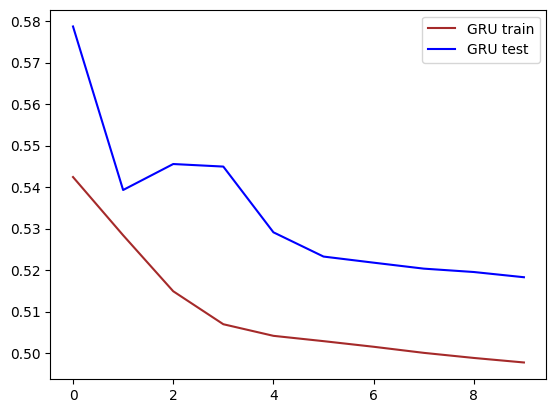

In [50]:
#dont run this cell if you are running this cell than add "validation_data=(test_X, test_y)" in model_gru.fit()
pyplot.plot(gru_history.history['loss'], label='GRU train', color='brown')
pyplot.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
pyplot.legend()
pyplot.show()

In [51]:
#test_y.reshape(8086,1)
#test_y.reshape(2627,1)
#test_y=test_y[:, :1]

#train_y=test_y[:, :1]
print(test_y)

[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [52]:
np.shape(pred_y)

(8068, 1)

In [53]:
pred_y

array([[0.2310706 ],
       [0.23069891],
       [0.23033372],
       ...,
       [0.22743616],
       [0.22730555],
       [0.227126  ]], dtype=float32)

In [54]:
pred_y=np.reshape(pred_y,8068)

0.16846628485737014
0.12610066794160968
0.4104464457847944
0.3437372180940302


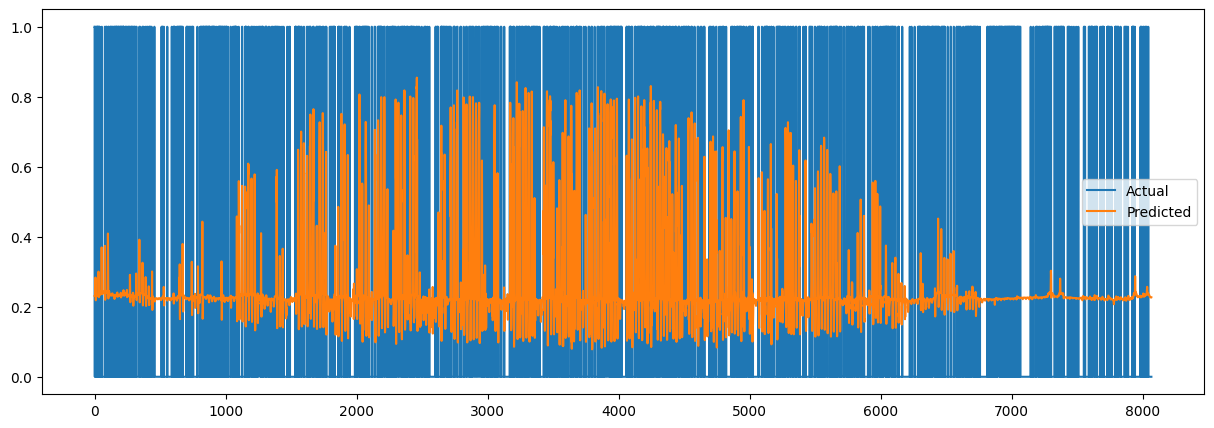

In [55]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,5)

from sklearn.metrics import *
from math import sqrt

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)

#plotting predicted test value vs actual test value
plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [56]:
np.shape(train_X)

(32272, 3, 5)

In [57]:
np.shape(train_y)

(32272, 1)

In [58]:
np.shape(test_X)

(8068, 3, 5)

In [59]:
np.shape(test_y)

(8068, 1)

1261/1261 [==============================] - 27s 21ms/step


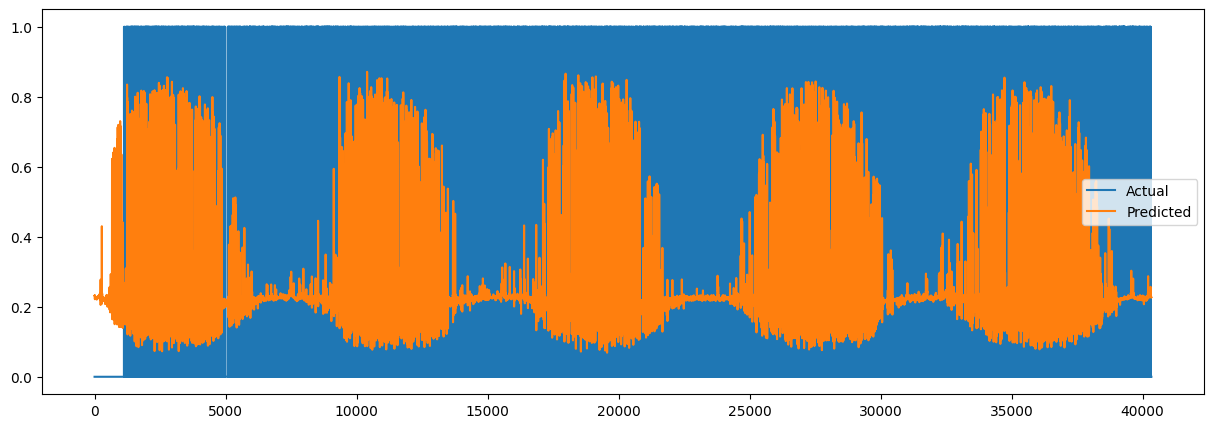

In [60]:
#visualization over full data
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

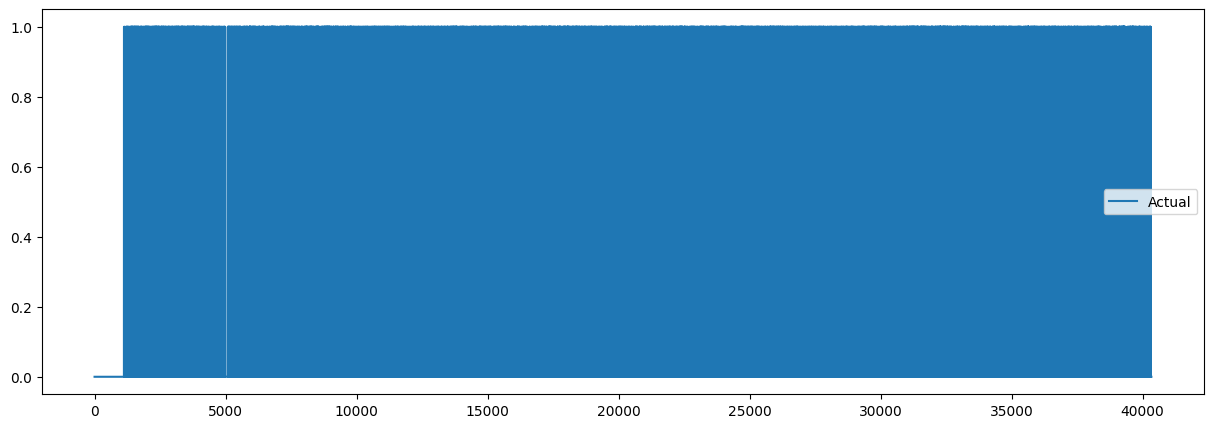

In [73]:
#over small part of data
plt.plot(tes, label = 'Actual')
#plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [75]:
print(sum(tes)/len(tes))

[0.24179474]


In [88]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.74811747]
[0.79389131]
total acc [0.79087754]


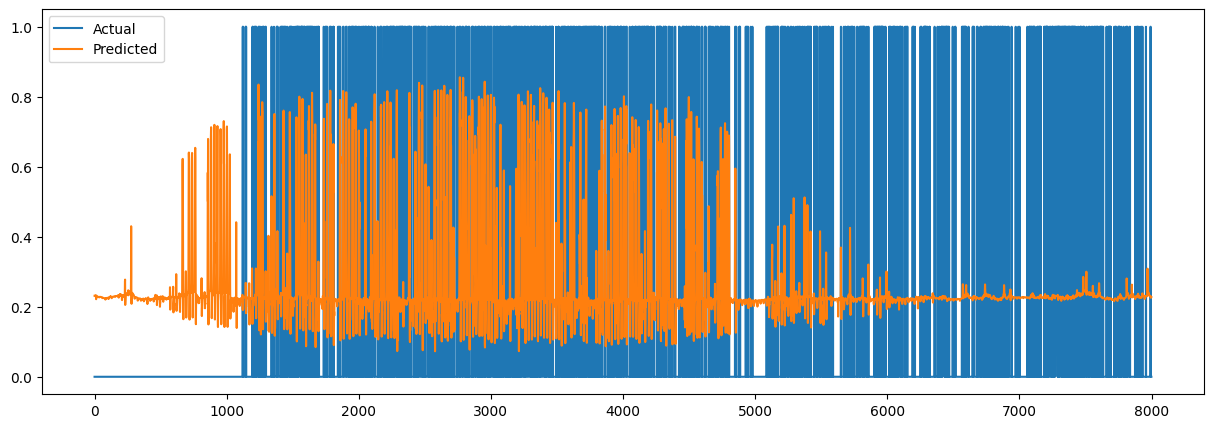

In [62]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:
            8000], label = 'Predicted')
plt.legend()
plt.show()

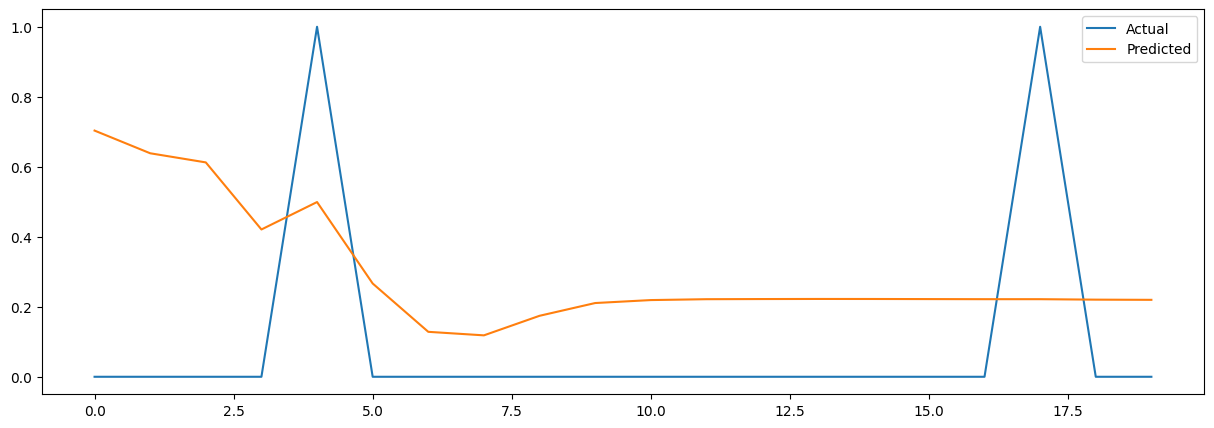

In [76]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

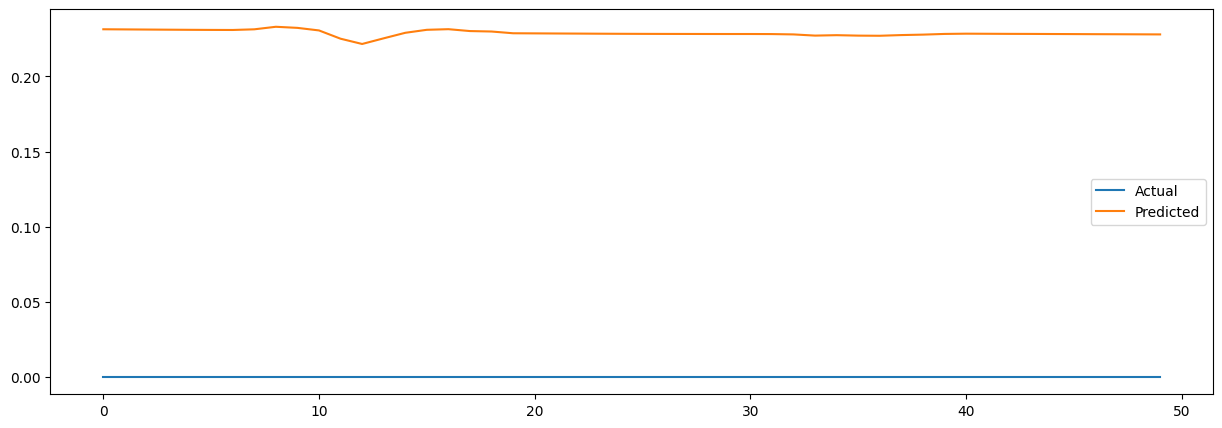

In [77]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

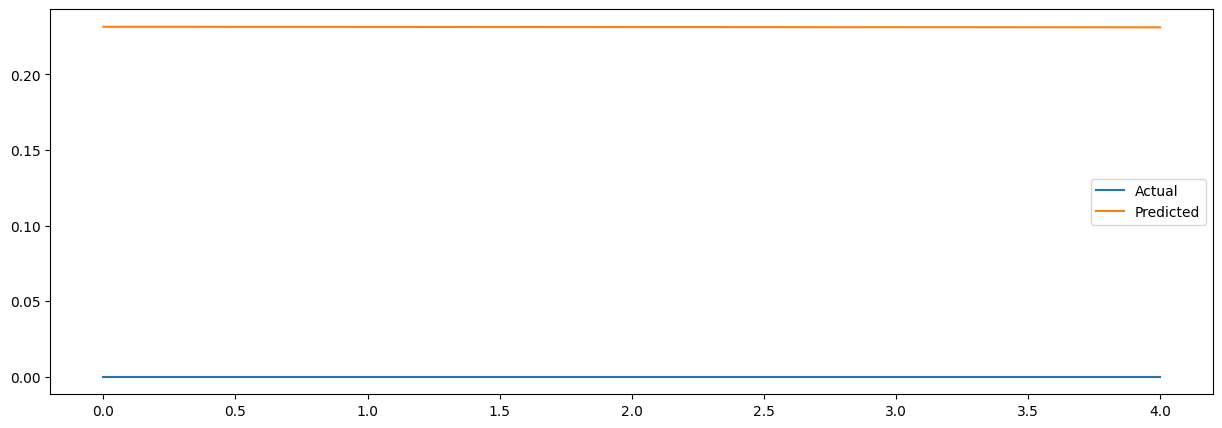

In [78]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

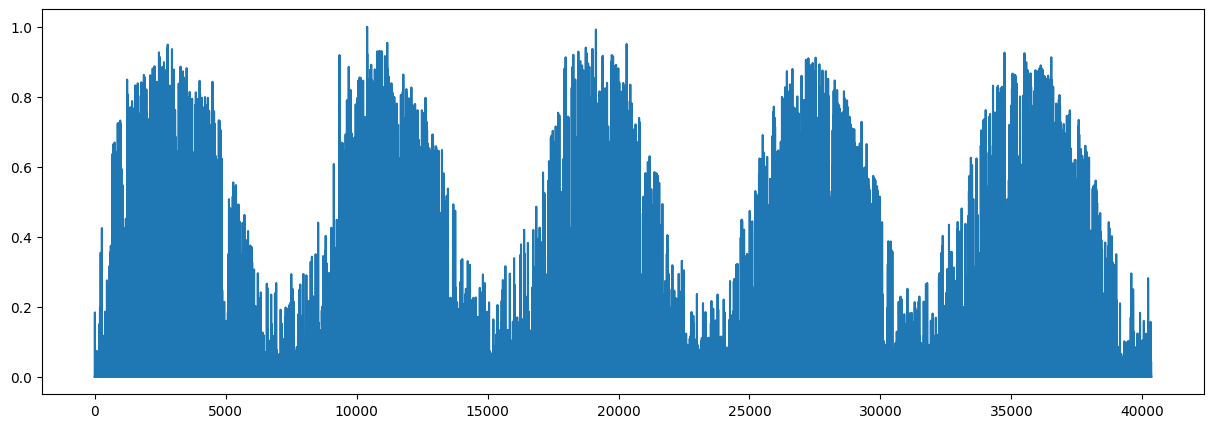

In [79]:
plt.plot(scaled[3], label = 'Actual')

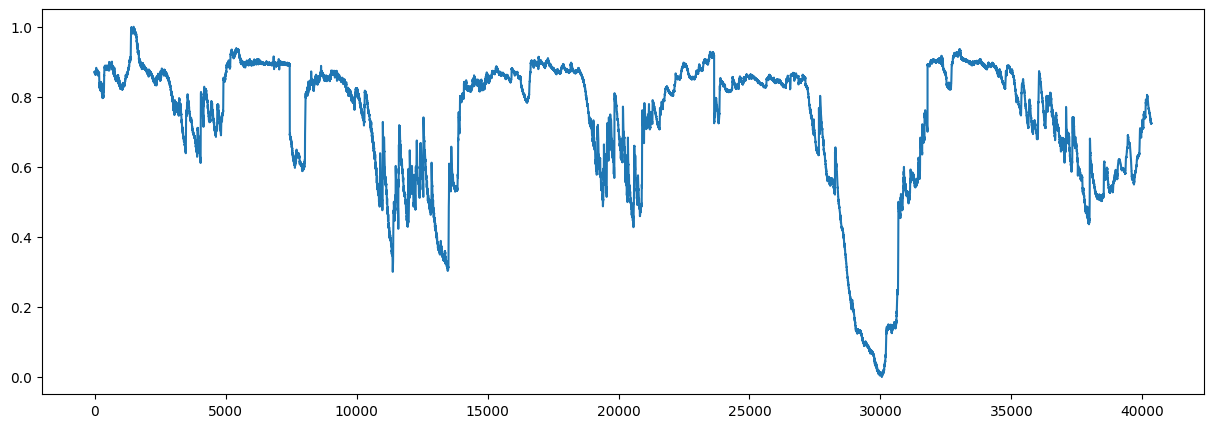

In [80]:
plt.plot(scaled[2], label = 'Actual')

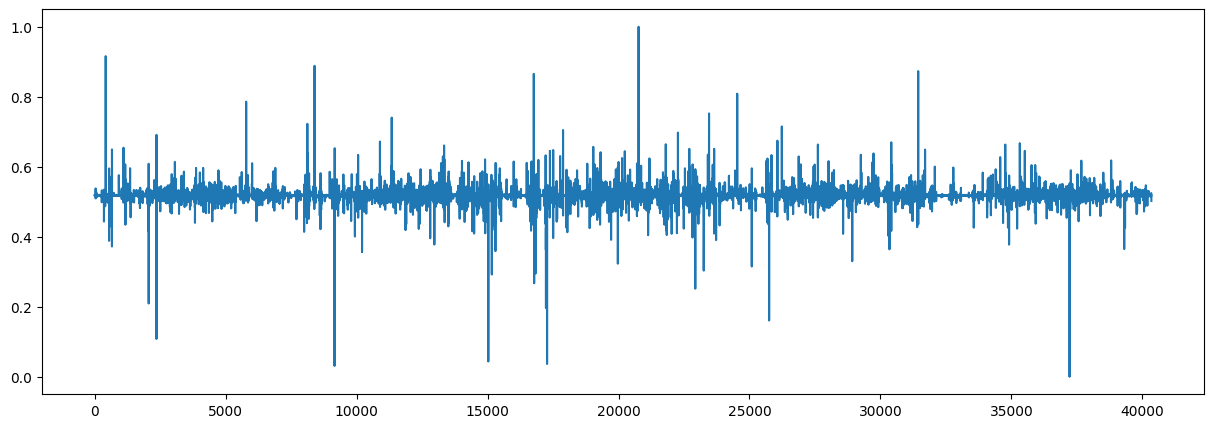

In [545]:
plt.plot(scaled[1], label = 'Actual')

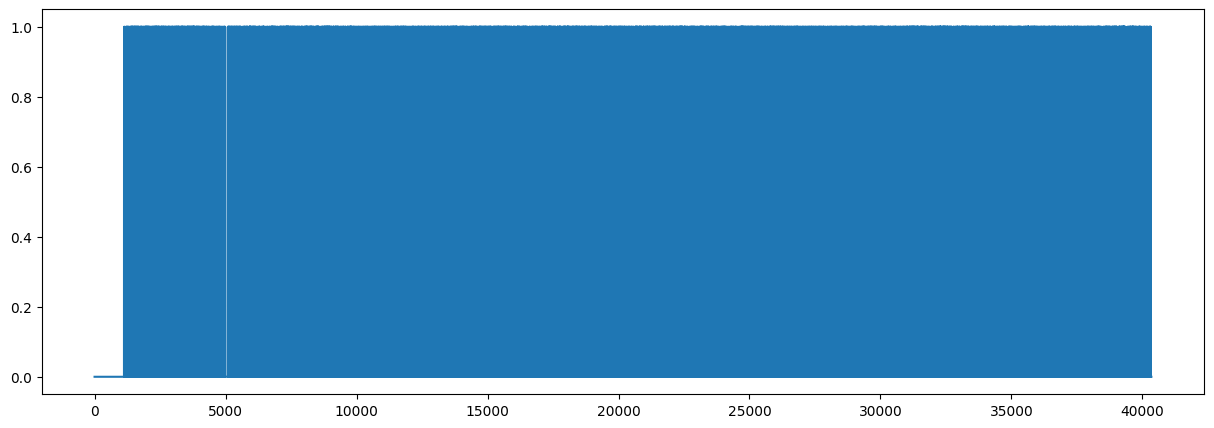

In [546]:
plt.plot(scaled[0], label = 'Actual')

In [ ]:
n_steps = 5
window_length = n_steps + 1 # zmienna docelowa = sygnał wejściowy przesunięty o jeden znak do przodu
dataset['fco2_HQ']=dataset['fco2_HQ'].astype('int64')
dataset2 = tf.data.Dataset.from_tensor_slices(dataset)
dataset2 = dataset2.repeat().window(window_length, shift=1, drop_remainder=True)

In [ ]:
dataset2 = dataset2.flat_map(lambda window: window.batch(window_length))

In [ ]:
batch_size = 32
dataset2 = dataset2.shuffle(10000).batch(batch_size)
dataset2 = dataset2.map(lambda windows: (windows[:, :-1], windows[:, 1:]))

In [ ]:
dataset2 = dataset2.prefetch(1)

In [ ]:
#dataset2 = dataset2.map(
 #   lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=1, dtype=tf.float32), Y_batch))

In [ ]:
for X_batch, Y_batch in dataset2.take(1):
    print(X_batch.shape, Y_batch.shape)

In [ ]:
train_size = 40342 * 90 // 100

In [ ]:
model = keras.models.Sequential([
    keras.layers.GRU(16, return_sequences=True, input_shape=[None,16],
                     # nie ma porzucania w stanowej sieci rekurencyjnej (https://github.com/ageron/handson-ml2/issues/32)
                     # dropout=0.2, recurrent_dropout=0.2,
                     ),
    keras.layers.GRU(16, return_sequences=True,
                     # dropout=0.2, recurrent_dropout=0.2
                    ),
    keras.layers.TimeDistributed(keras.layers.Dense(1,
                                                    activation="softmax"))
])
#model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
model.compile(loss="mse", optimizer="adam")
history = model.fit(dataset2, steps_per_epoch=train_size // batch_size,epochs=10)
#history = model.fit(dataset, epochs=20,validation_data=(X_batch, Y_batch))

In [ ]:
X_new = 
Y_pred = model.predict(X_new)[:, -1,-1][..., np.newaxis]

In [269]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid",
                        input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])